## Crop Recommendation System With Machine Learning Algorithm

####  Import Laibaries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt # vizualize 
import numpy as np
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read And Analysis Data Set 

In [2]:
crop_data = pd.read_csv('F:/Shihab MS/Thesis Wrok/Code/Dataset/Crop_and_fertilizer_dataset.csv')

In [3]:
crop_data.shape

(4513, 11)

In [4]:
crop_data.head(10)

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
5,Kolhapur,Black,100,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
6,Kolhapur,Black,75,55,105,7.0,1100,25,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
7,Kolhapur,Black,80,55,105,7.0,1100,25,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
8,Kolhapur,Black,85,55,105,7.0,1100,25,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
9,Kolhapur,Black,90,55,105,7.0,1100,25,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [5]:
### drop two unnecessary clumns
crop_data = crop_data.drop(columns=['District_Name', 'Link'])

In [6]:
def rename_columns(data):
    new_columns = []
    for column in data.columns:
        new_column_name = re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', column).lower()
        new_columns.append(new_column_name)
    data.columns = new_columns
rename_columns(crop_data)
print(crop_data.columns)

Index(['soil_color', 'nitrogen', 'phosphorus', 'potassium', 'ph', 'rainfall',
       'temperature', 'crop', 'fertilizer'],
      dtype='object')


In [7]:
# Columns Data Type
crop_data.dtypes

soil_color      object
nitrogen         int64
phosphorus       int64
potassium        int64
ph             float64
rainfall         int64
temperature      int64
crop            object
fertilizer      object
dtype: object

In [8]:
crop_data['crop'].value_counts()

crop
Sugarcane    1010
Wheat         859
Cotton        650
Jowar         394
Maize         350
Rice          309
Groundnut     177
Tur           126
Ginger        125
Grapes        125
Urad           99
Moong          99
Gram           78
Turmeric       55
Soybean        45
Masoor         12
Name: count, dtype: int64

#### Check Missing Value 

In [9]:
# Checking Missing and duplicates
print(f'Number of Missing values: \n{crop_data.isna().sum()}')
print('---------------------------------------------------')
print(f'Number of Duplicate values: {crop_data.duplicated().sum()}')

Number of Missing values: 
soil_color     0
nitrogen       0
phosphorus     0
potassium      0
ph             0
rainfall       0
temperature    0
crop           0
fertilizer     0
dtype: int64
---------------------------------------------------
Number of Duplicate values: 0


#### Exploratory Data Analysis

#### Histograms and Box Plots for Numerical Data

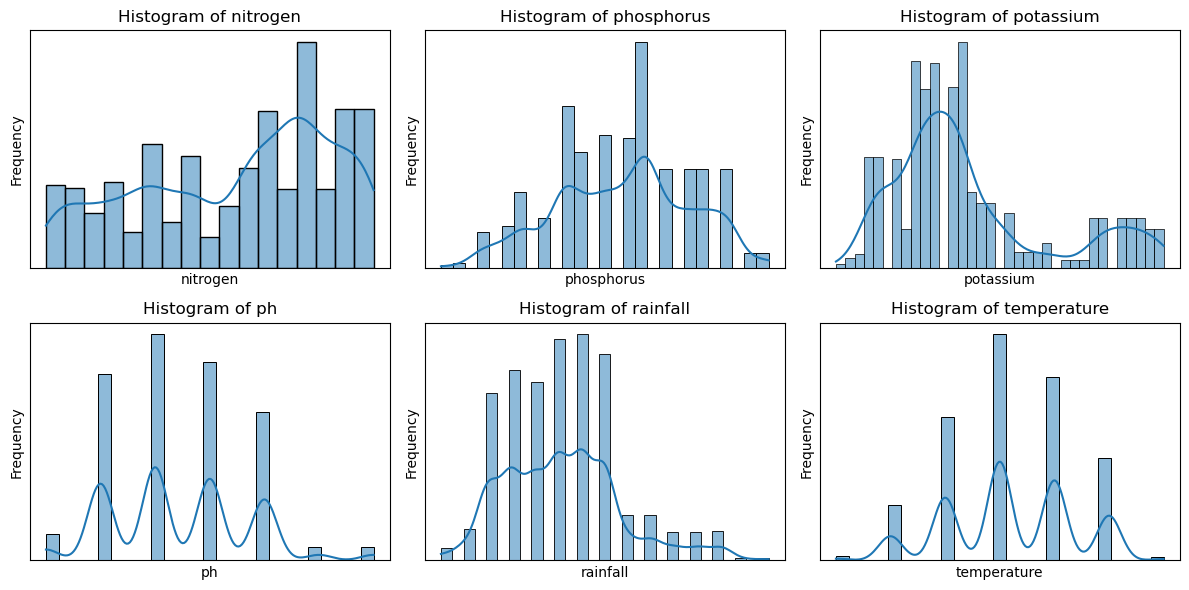

In [10]:
n = len(crop_data.select_dtypes(include = [np.number]).columns)
nrow = int(np.ceil(n / 3))

fig, axes = plt.subplots(nrow, 3, figsize = (12,6))

for i, col in enumerate(crop_data.select_dtypes(include = [np.number]).columns):
    ax = axes.flat[i]
    sns.histplot(crop_data[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_xticks([])
    ax.set_yticks([])
    
for ax in axes.flat[n:]:
    ax.axis('off')
    
fig.tight_layout()
plt.show()

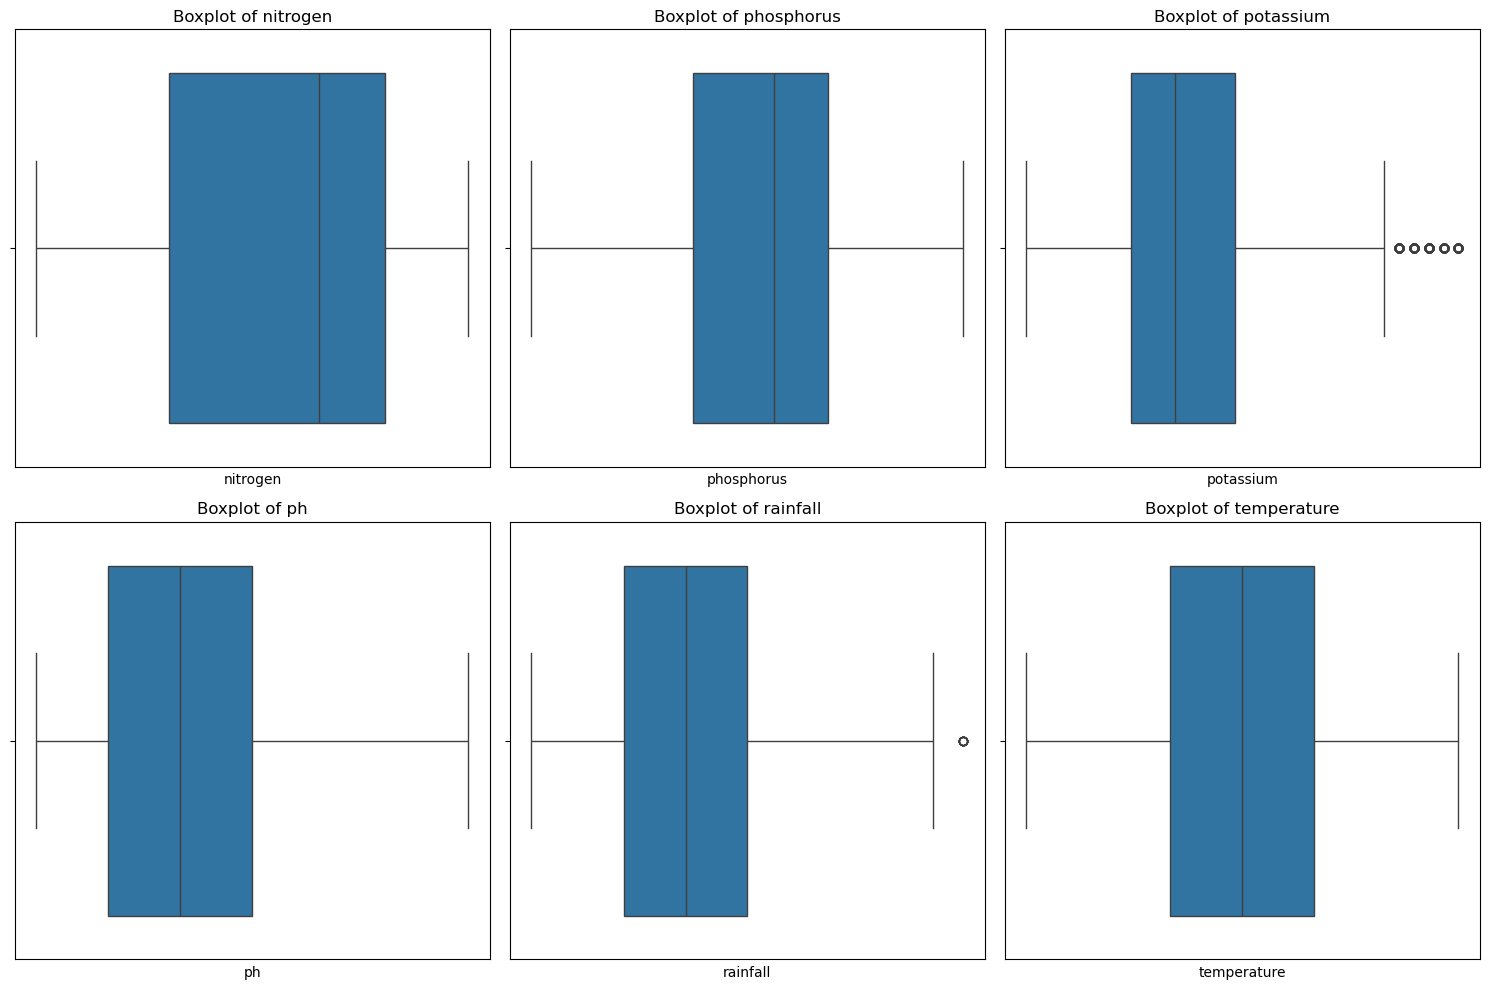

In [11]:
# Number of numeric columns
n = len(crop_data.select_dtypes(include=[np.number]).columns)
nrow = int(np.ceil(n / 3))

# Create subplots
fig, axes = plt.subplots(nrow, 3, figsize=(15, 5 * nrow))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(crop_data.select_dtypes(include=[np.number]).columns):
    sns.boxplot(x=crop_data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_xticks([])

# Turn off the axes of the remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.tight_layout()
plt.show()


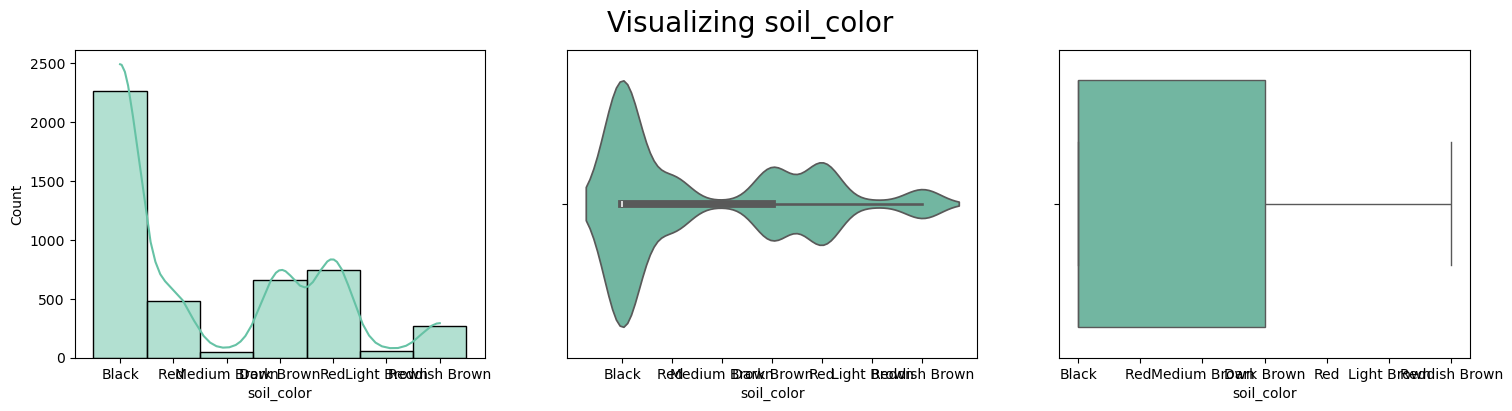

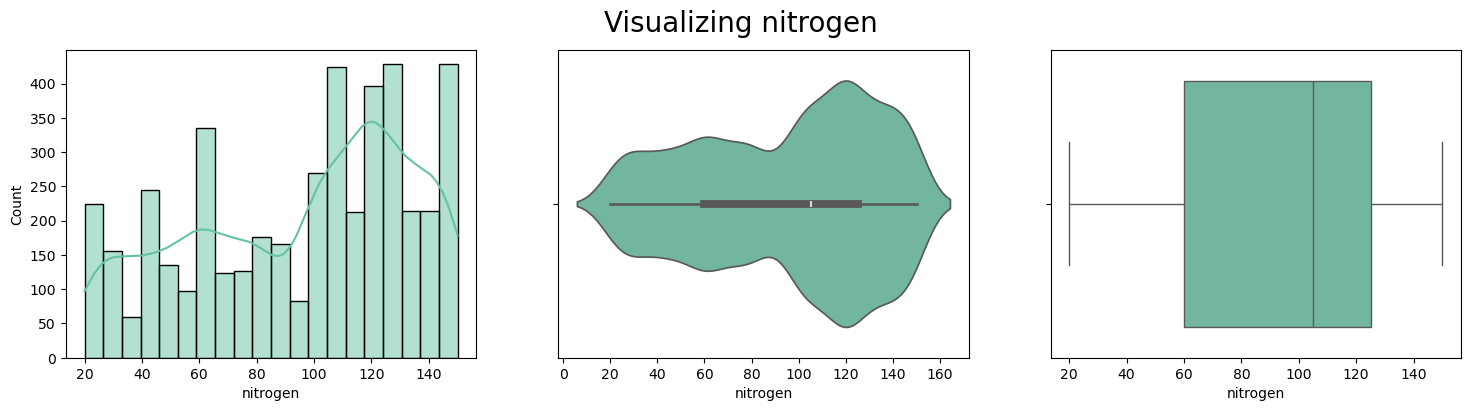

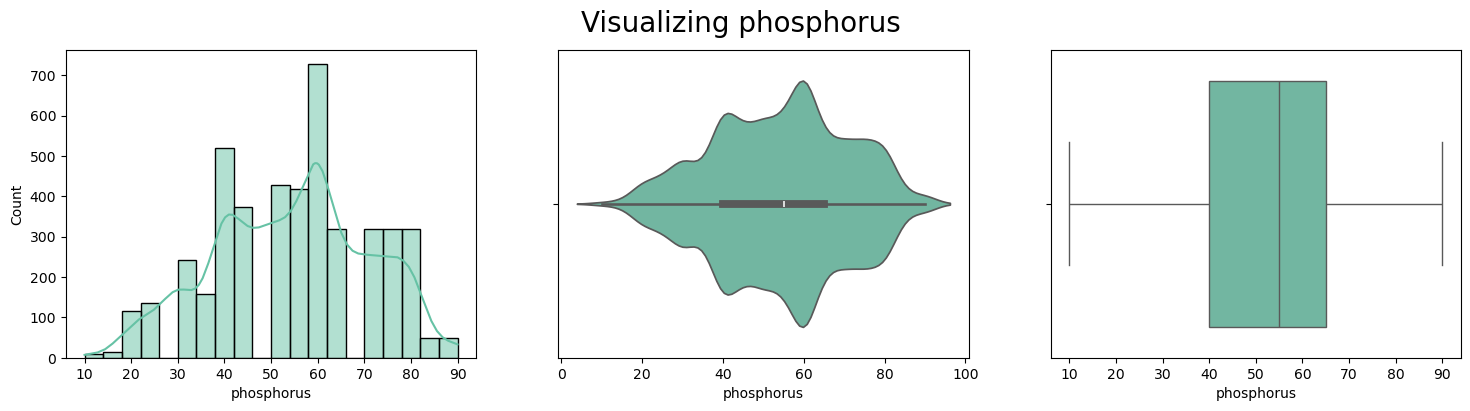

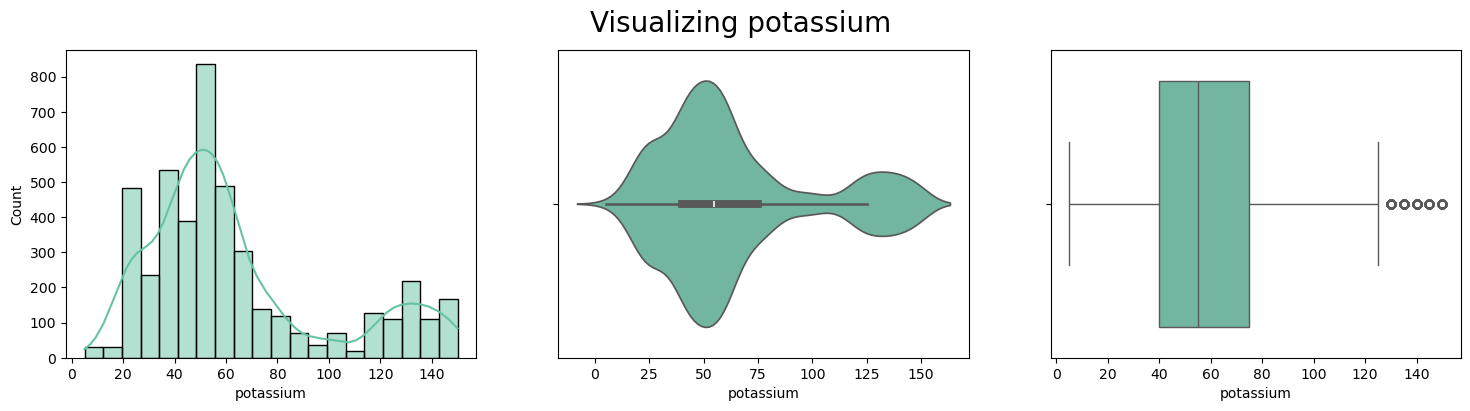

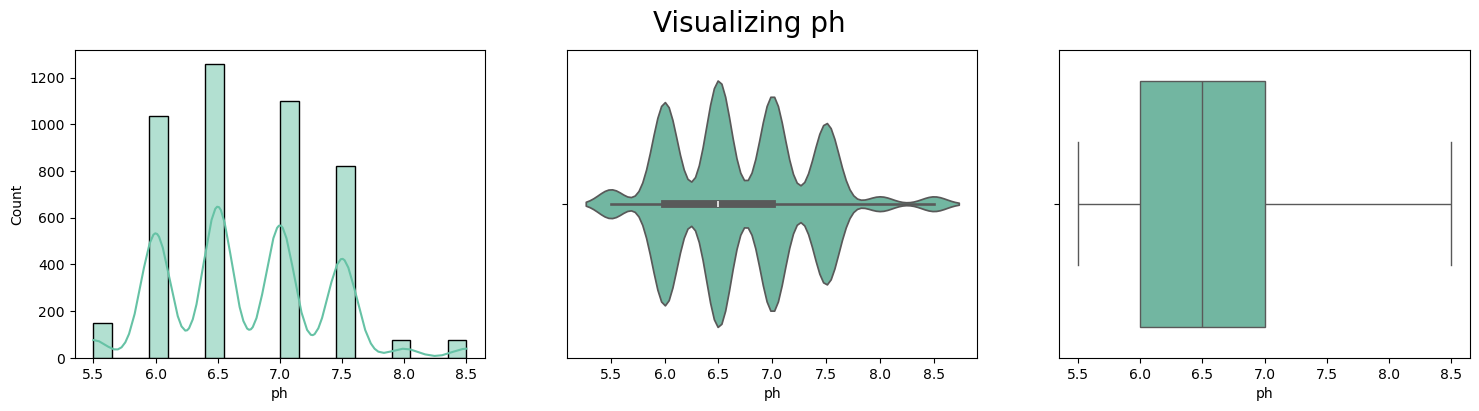

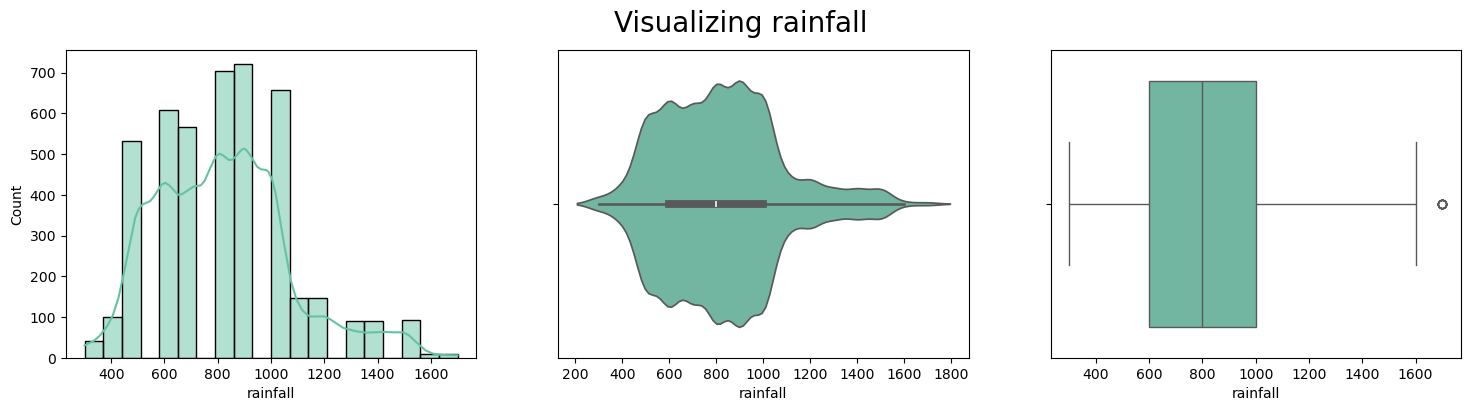

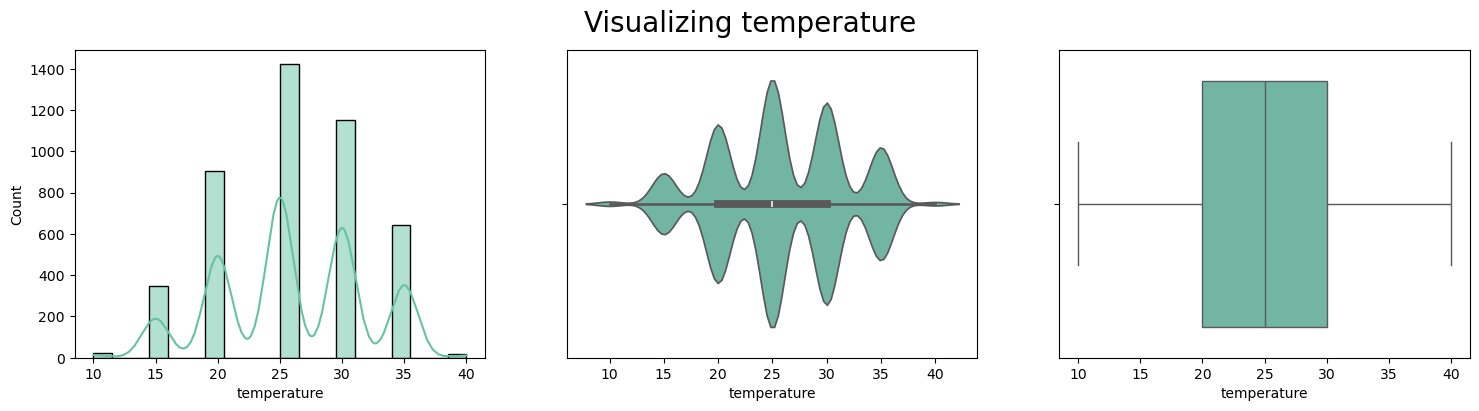

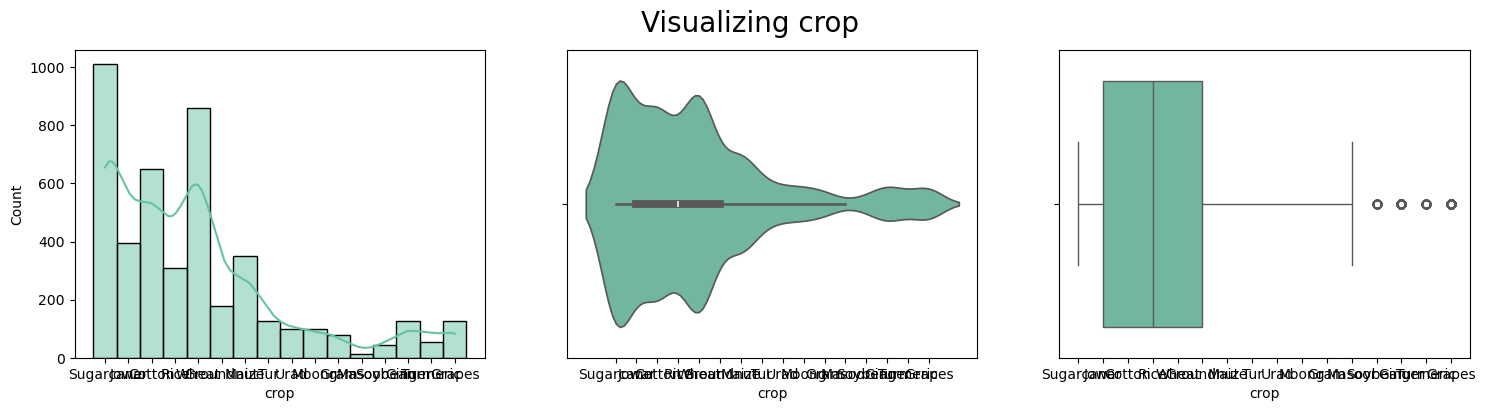

In [12]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in crop_data.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=crop_data,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=crop_data,x=i,ax=ax[1])
    sns.boxplot(data=crop_data,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

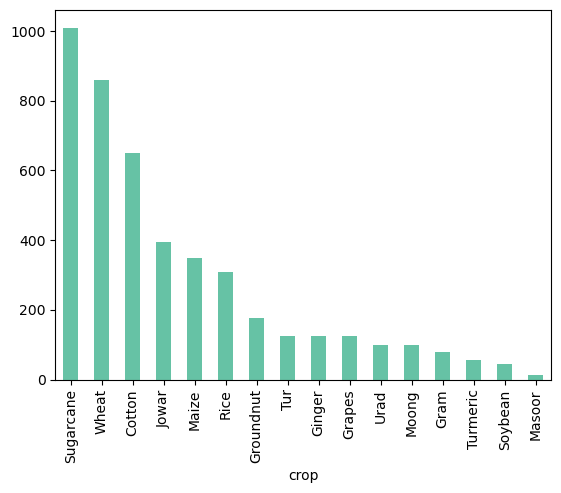

In [13]:
labels = crop_data["crop"].unique()
crop_data["crop"].value_counts().plot(kind="bar")
plt.show()

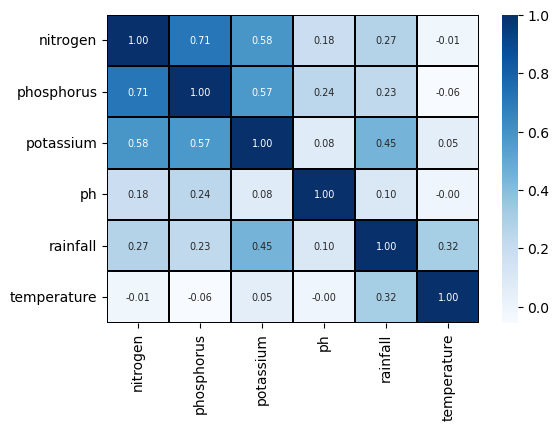

In [14]:
# Exclude non-numeric columns
numeric_df = crop_data.select_dtypes(include=[float, int])

# Correlation Matrix:
plt.figure(figsize = (6,4))
corr = numeric_df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = 0.01, linecolor = 'black',
           fmt = '0.2f', annot_kws = {'fontsize' : 7})
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10, rotation = 0)
plt.show()

####  Bivariatte Analysis

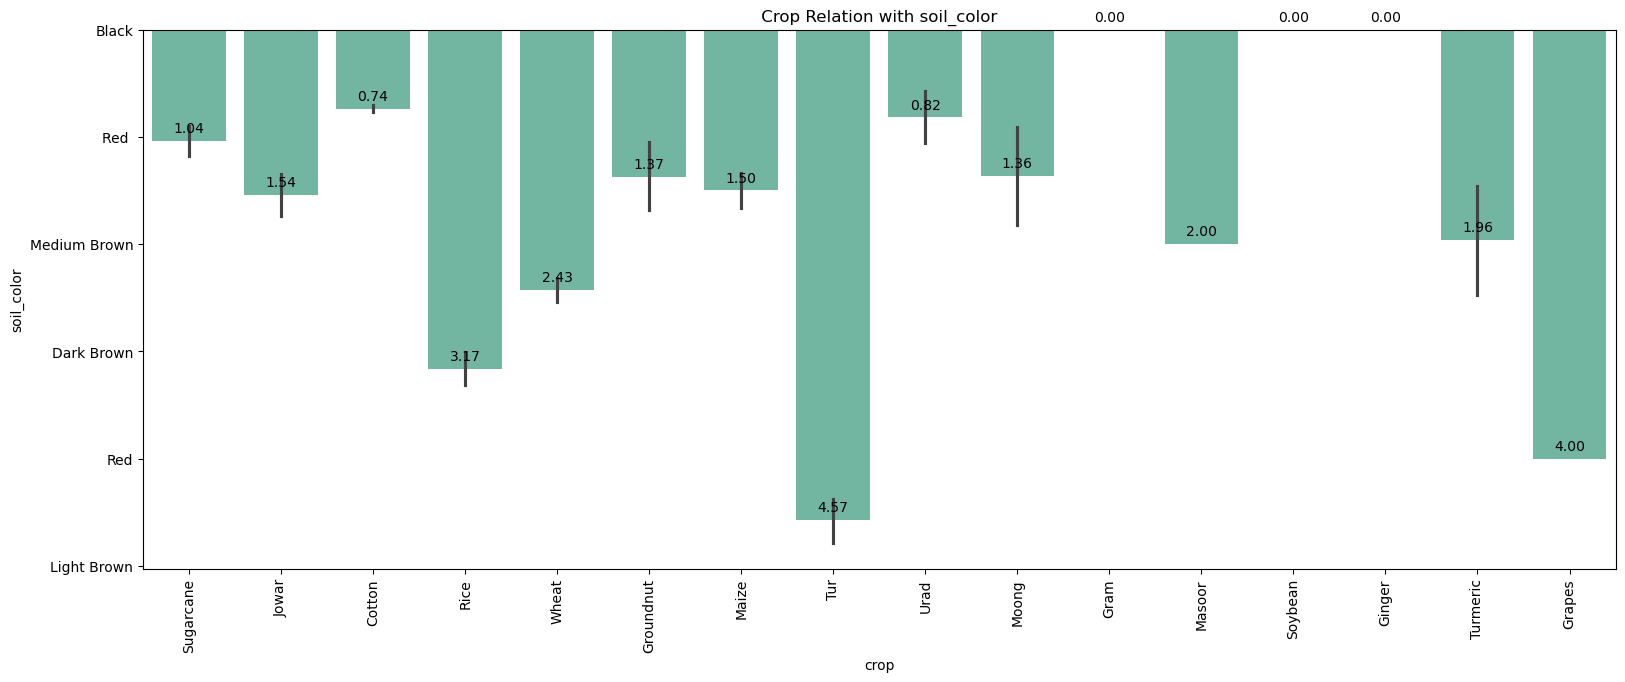

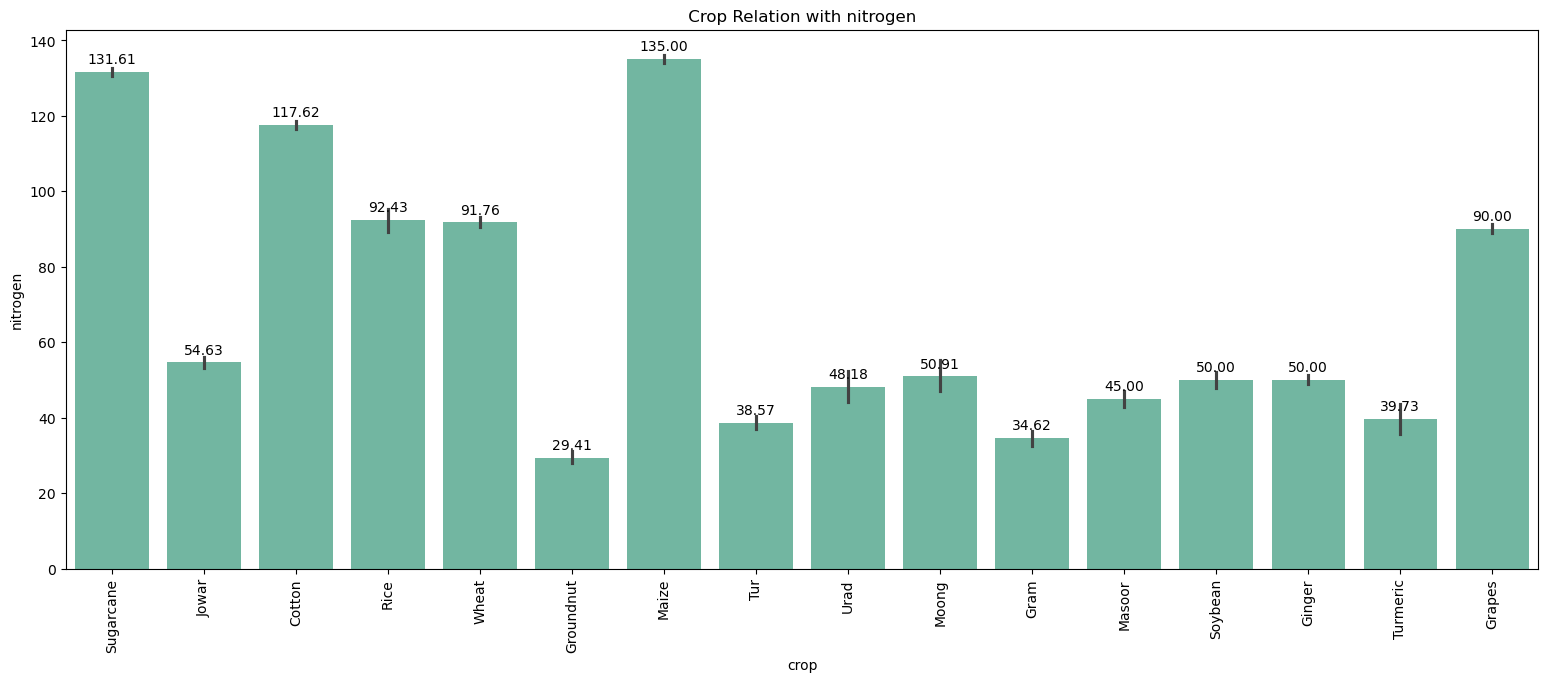

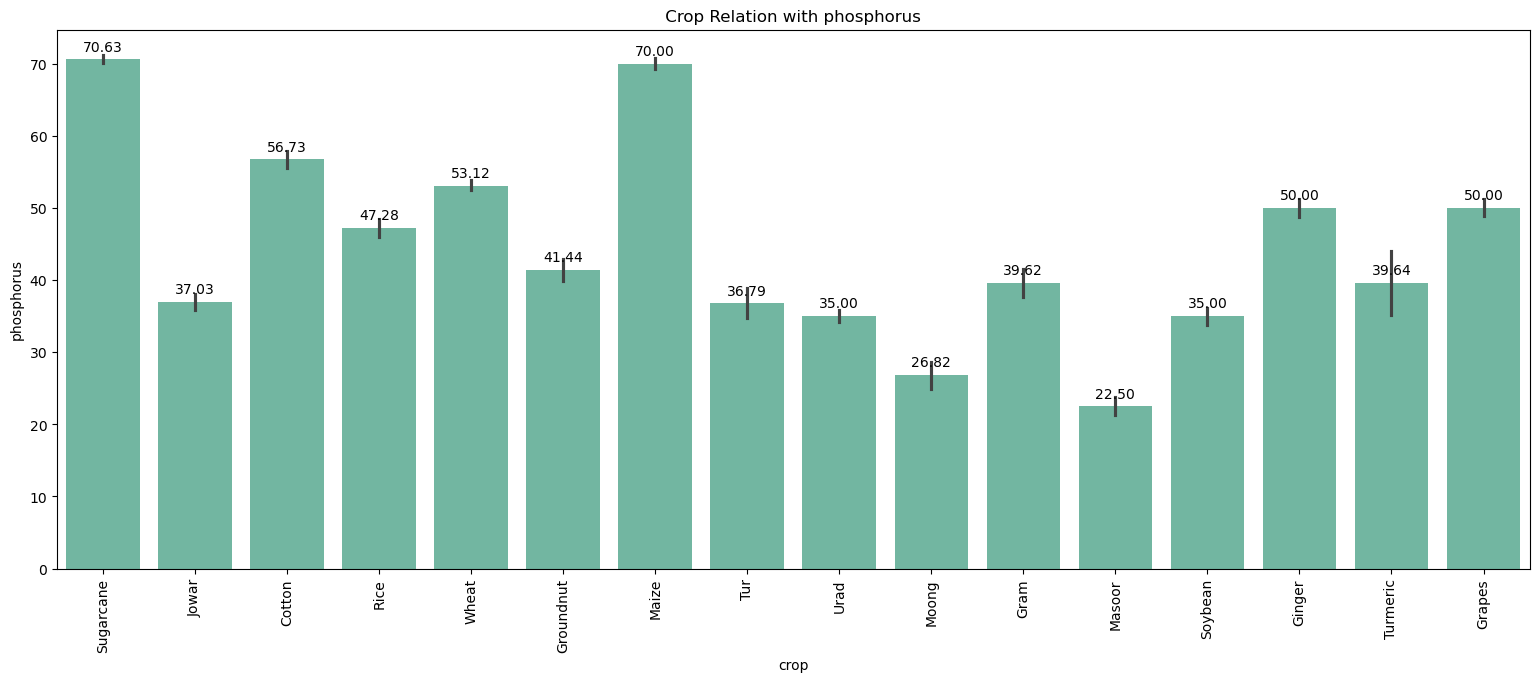

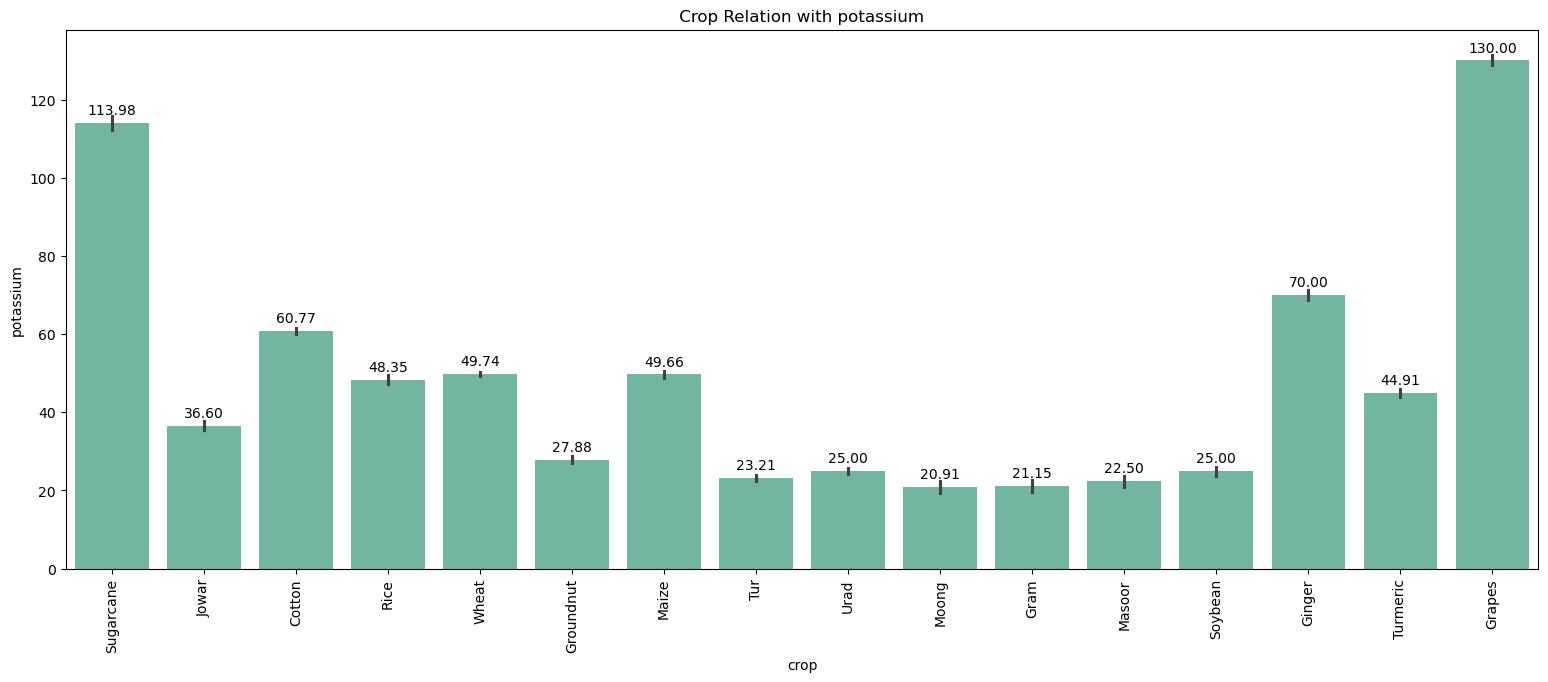

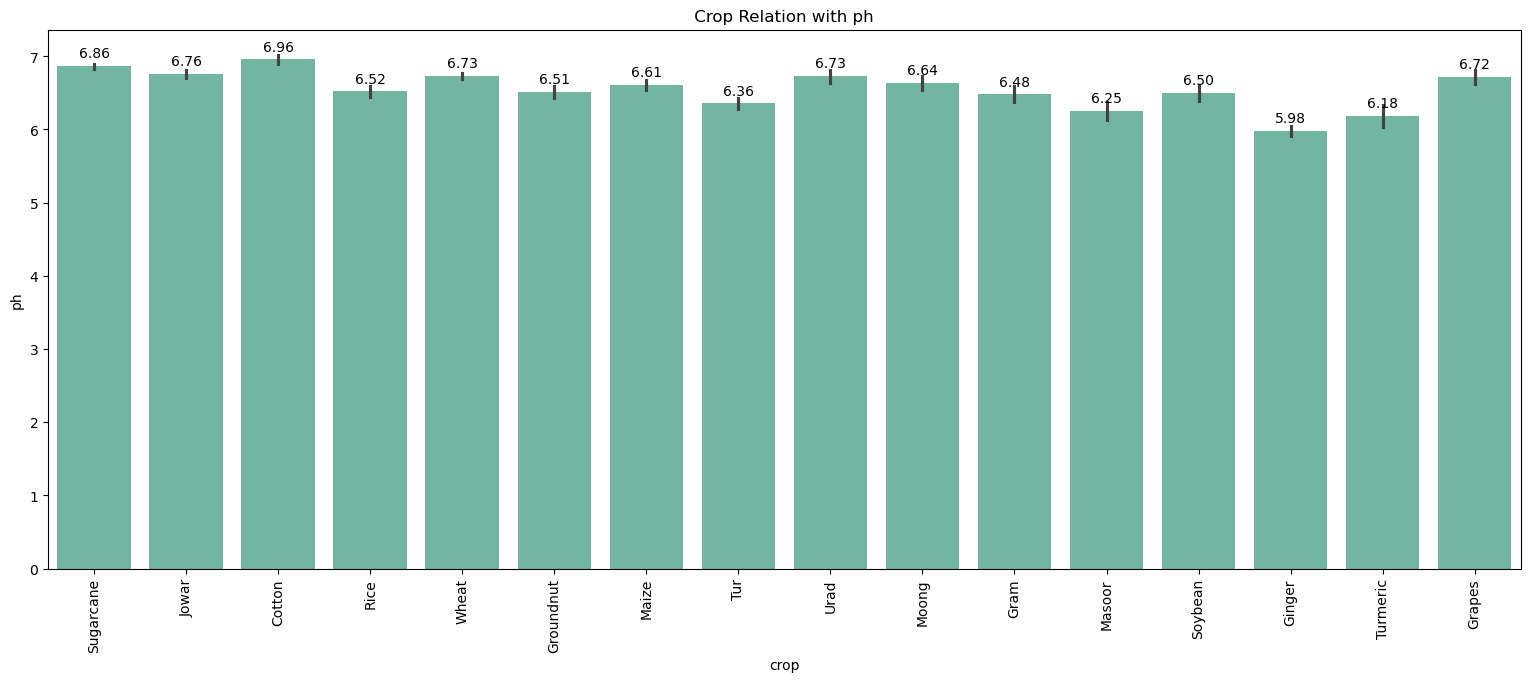

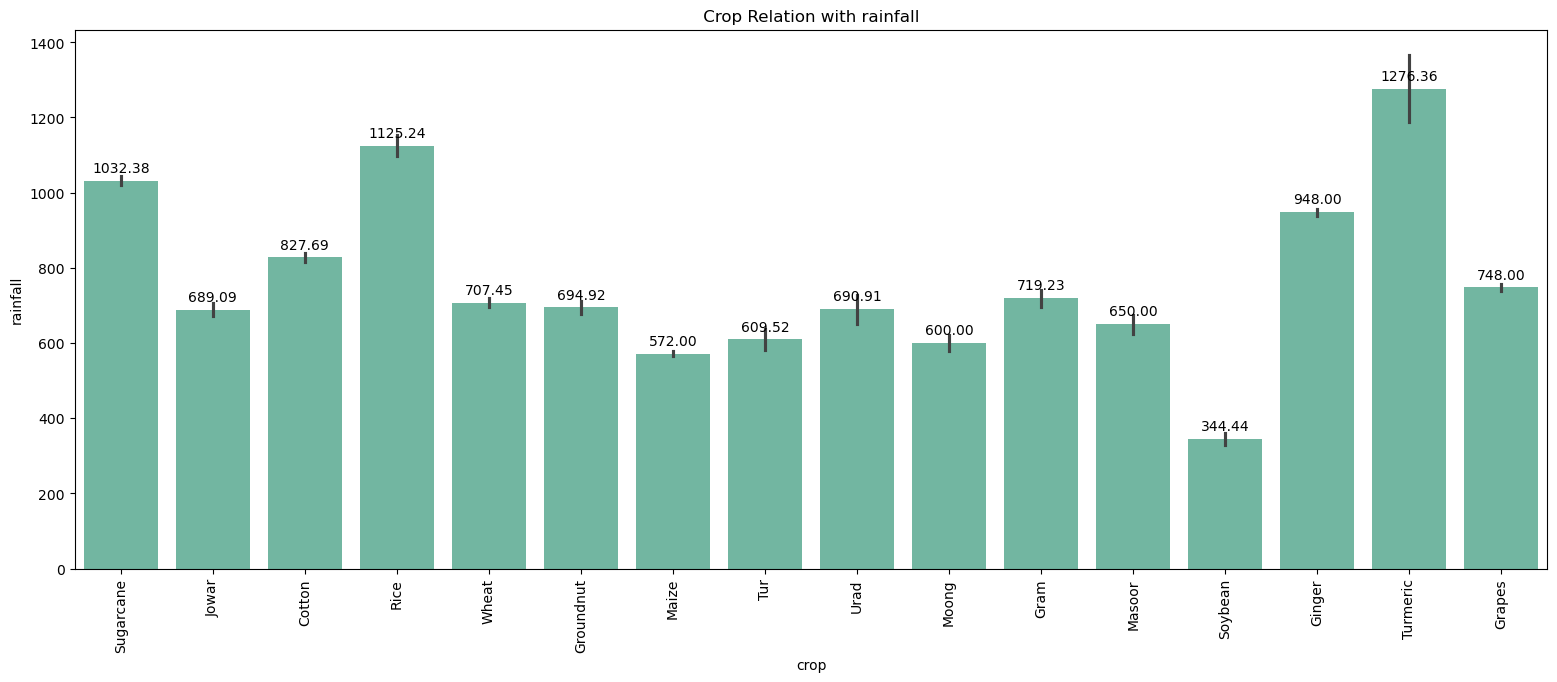

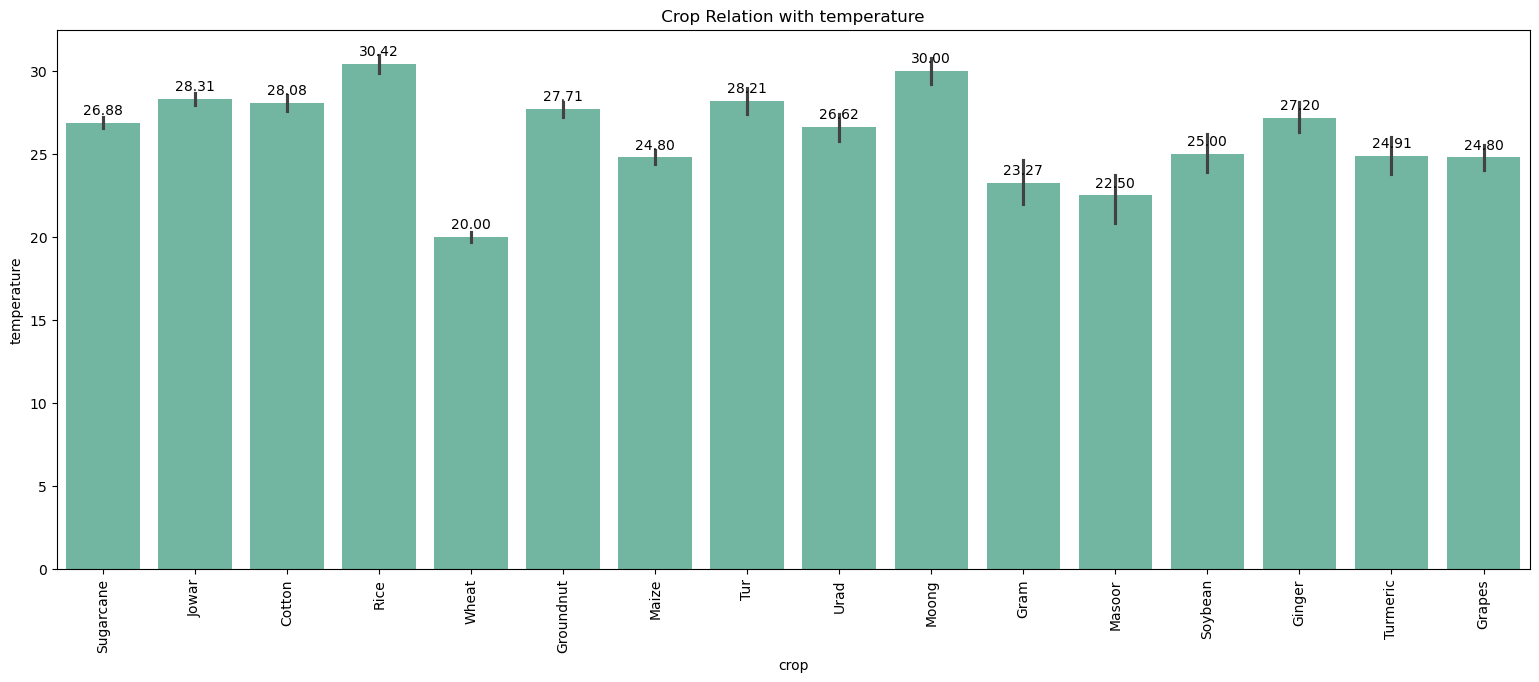

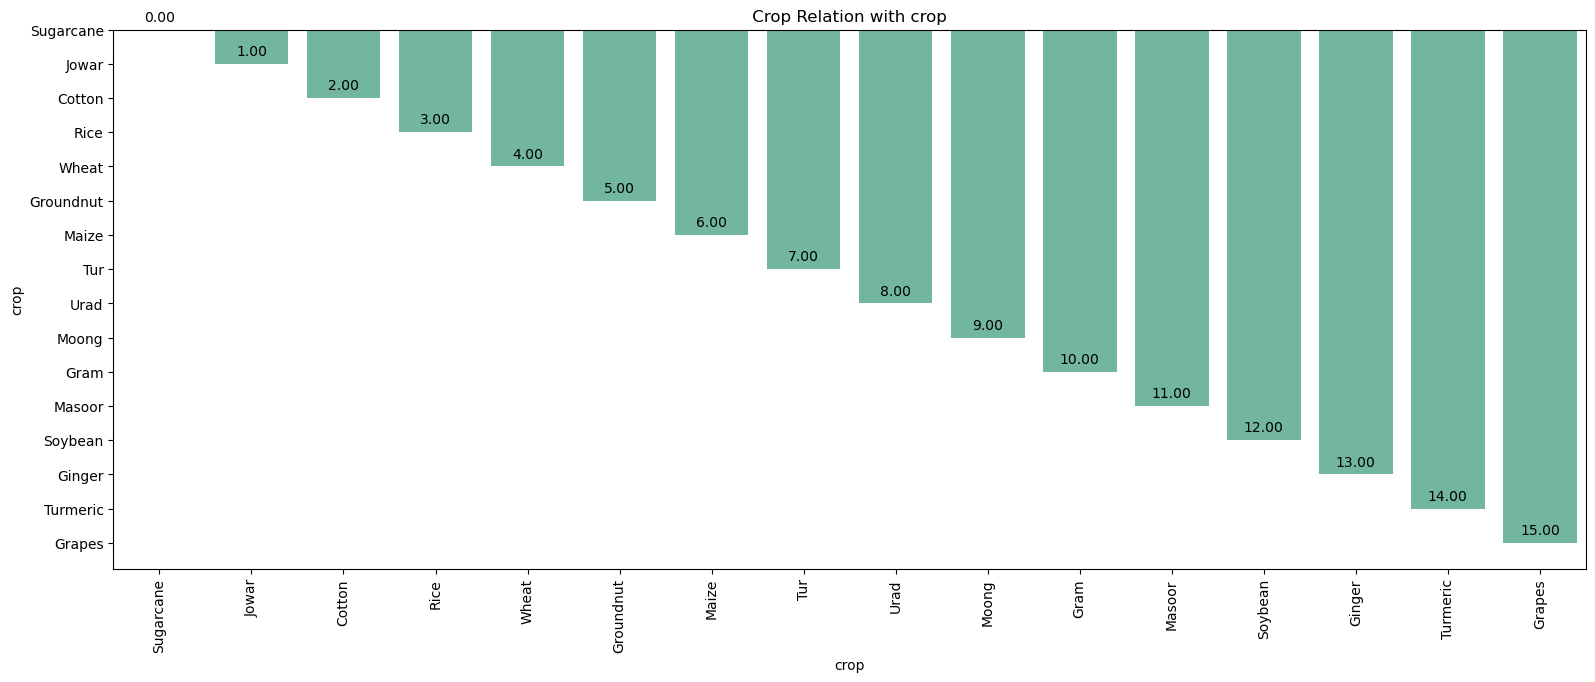

In [15]:
all_columns = crop_data.columns[:-1]

for column in all_columns:
    plt.figure(figsize=(19, 7))
    ax = sns.barplot(x="crop", y=column, data=crop_data)
    plt.xticks(rotation=90)
    plt.title( f" Crop Relation with {column} ")
    
    # Annotate each bar with the value
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.show()

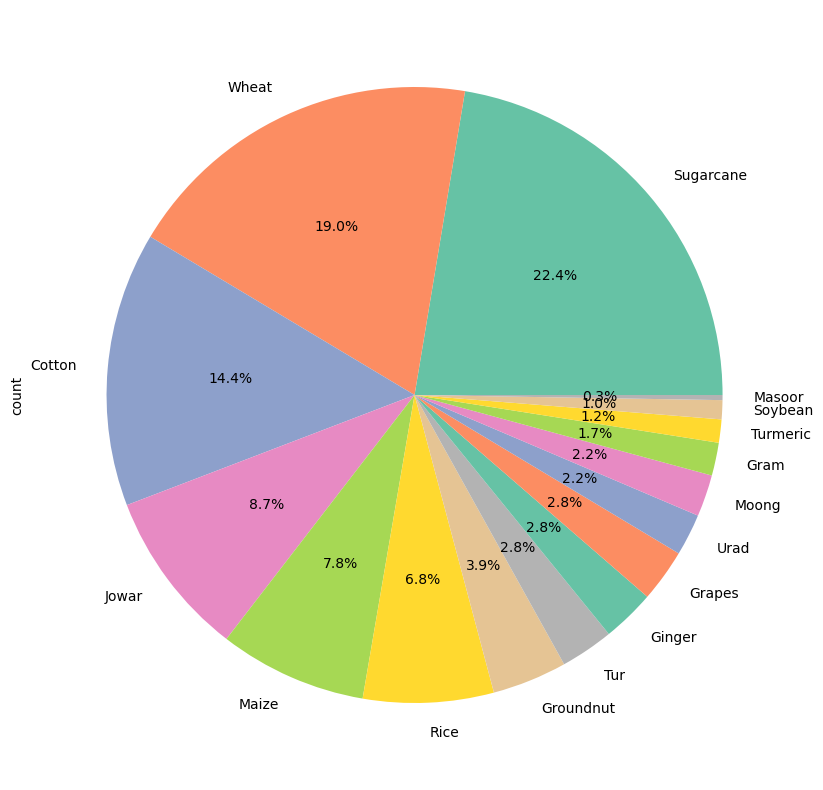

In [16]:
plt.figure(figsize=(10,10))
crop_data['crop'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

#### Data Pre-Processing

#### Encoding Categorical Feature

In [17]:
# Convert categorical data to numerical using the mappings provided
soil_color_map = {
    "Black": 1, "Red": 2, "Dark Brown": 3, "Reddish Brown": 4,
    "Light Brown": 5, "Medium Brown": 6
}

fertilizer_map = {
    "Urea": 1, "DAP": 2, "MOP": 3, "19:19:19 NPK": 4, "SSP": 5,
    "Magnesium Sulphate": 6, "10:26:26 NPK": 7, "50:26:26 NPK": 8,
    "Chelated Micronutrient": 9, "12:32:16 NPK": 10, "Ferrous Sulphate": 11,
    "13:32:26 NPK": 12, "Ammonium Sulphate": 13, "10:10:10 NPK": 14,
    "Hydrated Lime": 15, "White Potash": 16, "20:20:20 NPK": 17,
    "18:46:00 NPK": 18, "Sulphur": 19
}

crop_map = {
    "Sugarcane": 1, "Wheat": 2, "Cotton": 3, "Jowar": 4, "Maize": 5,
    "Rice": 6, "Groundnut": 7, "Tur": 8, "Grapes": 9, "Ginger": 10,
    "Urad": 11, "Moong": 12, "Gram": 13, "Turmeric": 14, "Soybean": 15,
    "Masoor": 16, "Banana": 17, "Sunflower": 18, "Pigeon Pea": 19, "Cabbage": 20
}

crop_data['soil_color'] = crop_data['soil_color'].map(soil_color_map)
crop_data['fertilizer'] = crop_data['fertilizer'].map(fertilizer_map)
crop_data['crop'] = crop_data['crop'].map(crop_map)

In [18]:
# Checking Missing and duplicates
print(f'Number of Missing values: \n{crop_data.isna().sum()}')
print('---------------------------------------------------')
print(f'Number of Duplicate values: {crop_data.duplicated().sum()}')

Number of Missing values: 
soil_color     480
nitrogen         0
phosphorus       0
potassium        0
ph               0
rainfall         0
temperature      0
crop             0
fertilizer     108
dtype: int64
---------------------------------------------------
Number of Duplicate values: 0


In [19]:
crop_data.fillna(crop_data.mean(), inplace=True)

In [20]:
# Checking Missing and duplicates
print(f'Number of Missing values: \n{crop_data.isna().sum()}')
print('---------------------------------------------------')
print(f'Number of Duplicate values: {crop_data.duplicated().sum()}')

Number of Missing values: 
soil_color     0
nitrogen       0
phosphorus     0
potassium      0
ph             0
rainfall       0
temperature    0
crop           0
fertilizer     0
dtype: int64
---------------------------------------------------
Number of Duplicate values: 0


#### Outlier Detection With IQR Technique

In [21]:
# Select numerical columns
numerical_columns = crop_data.select_dtypes(include=[np.number]).columns

# Function to identify outliers using IQR method
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Dictionary to store outliers for each column
outliers_dict = {}

for col in numerical_columns:
    outliers = find_outliers(crop_data, col)
    outliers_dict[col] = outliers
    print(f'Number of outliers in {col}: {len(outliers)}')

# Display outliers for each column (if needed)
for col, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f'\nOutliers in {col}:\n{outliers}')

# Optional: Displaying first few rows of outliers for each column
for col, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f'\nOutliers in {col} (first 5 rows):')
        print(outliers.head())

Number of outliers in soil_color: 370
Number of outliers in nitrogen: 0
Number of outliers in phosphorus: 0
Number of outliers in potassium: 495
Number of outliers in ph: 0
Number of outliers in rainfall: 9
Number of outliers in temperature: 0
Number of outliers in crop: 190
Number of outliers in fertilizer: 237

Outliers in soil_color:
      soil_color  nitrogen  phosphorus  potassium   ph  rainfall  temperature  \
624          6.0        20          15         20  5.5       700           25   
625          6.0        25          15         20  5.5       700           25   
626          6.0        30          15         20  5.5       700           25   
627          6.0        20          20         25  6.0       800           30   
628          6.0        25          20         25  6.0       800           30   
...          ...       ...         ...        ...  ...       ...          ...   
4182         4.0       100          60         45  7.5       900           15   
4183         

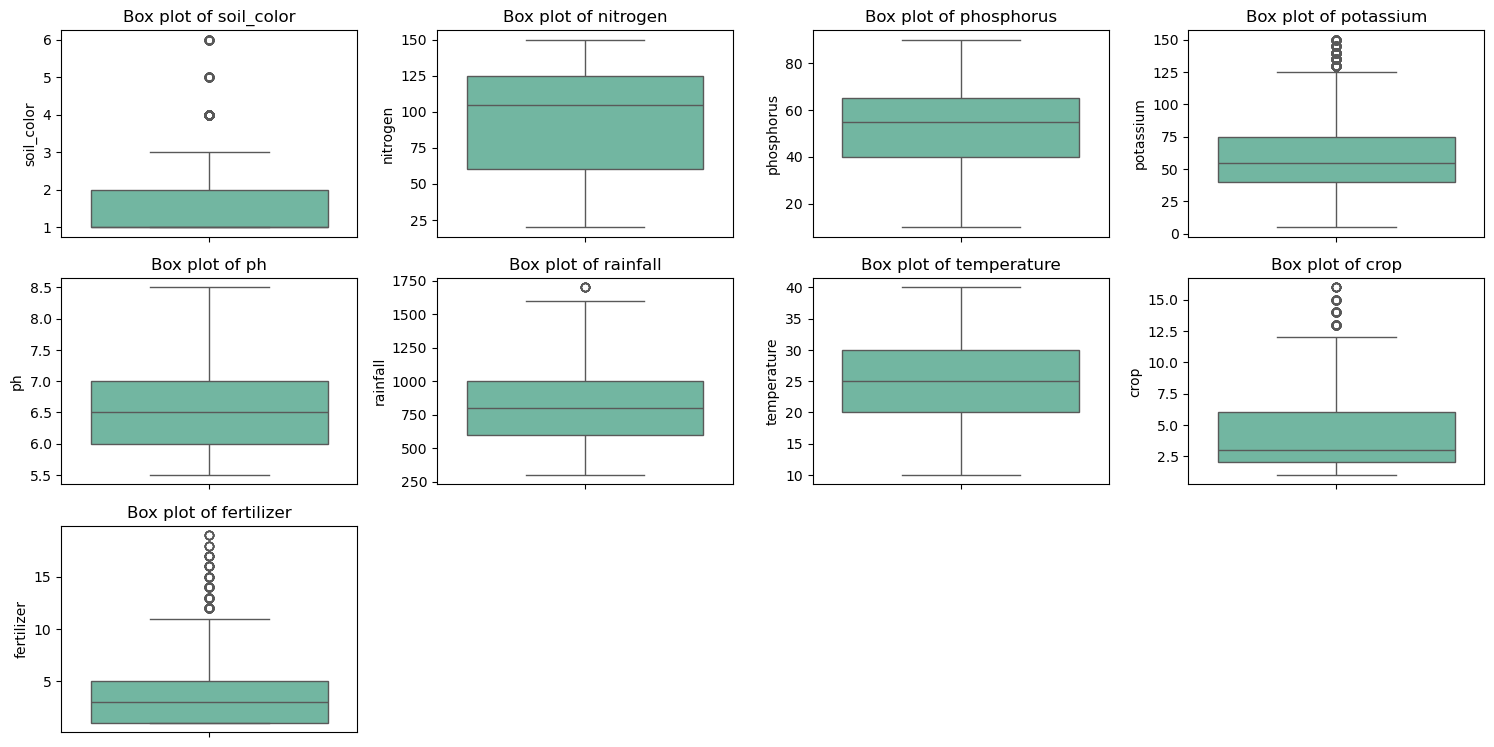

In [22]:
# Plot box plots for each numerical column to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=crop_data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


#### Handling Outlair 

In [23]:
# Remove outliers from the dataset
for col in numerical_columns:
    Q1 = crop_data[col].quantile(0.25)
    Q3 = crop_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    crop_data = crop_data[(crop_data[col] >= lower_bound) & (crop_data[col] <= upper_bound)]

print(f'Dataset shape after removing outliers: {crop_data.shape}')

Dataset shape after removing outliers: (3040, 9)


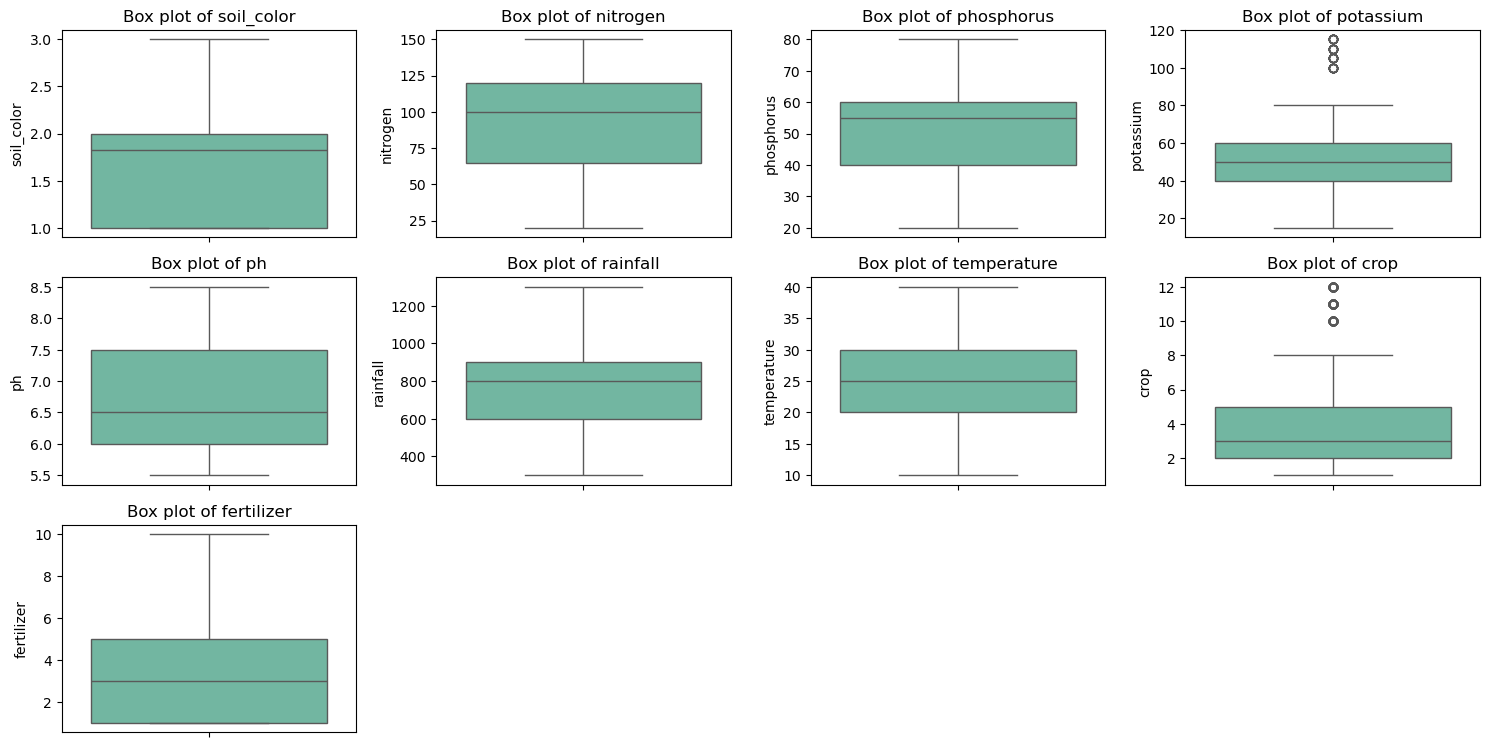

In [24]:
# Plot box plots for each numerical column to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=crop_data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


In [25]:
crop_data.head(5)

,soil_color,nitrogen,phosphorus,potassium,ph,rainfall,temperature,crop,fertilizer
0,1.0,75,50,100,6.5,1000,20,1,1.0
1,1.0,80,50,100,6.5,1000,20,1,1.0
2,1.0,85,50,100,6.5,1000,20,1,1.0
3,1.0,90,50,100,6.5,1000,20,1,1.0
4,1.0,95,50,100,6.5,1000,20,1,1.0


#### Checking Data Imblance 

Counts of target classes:
crop
2     814
3     584
4     394
5     350
1     223
6     198
7     150
11     99
8      81
10     75
12     72
Name: count, dtype: int64

Percentage distribution of target classes:
crop
2     26.776316
3     19.210526
4     12.960526
5     11.513158
1      7.335526
6      6.513158
7      4.934211
11     3.256579
8      2.664474
10     2.467105
12     2.368421
Name: proportion, dtype: float64


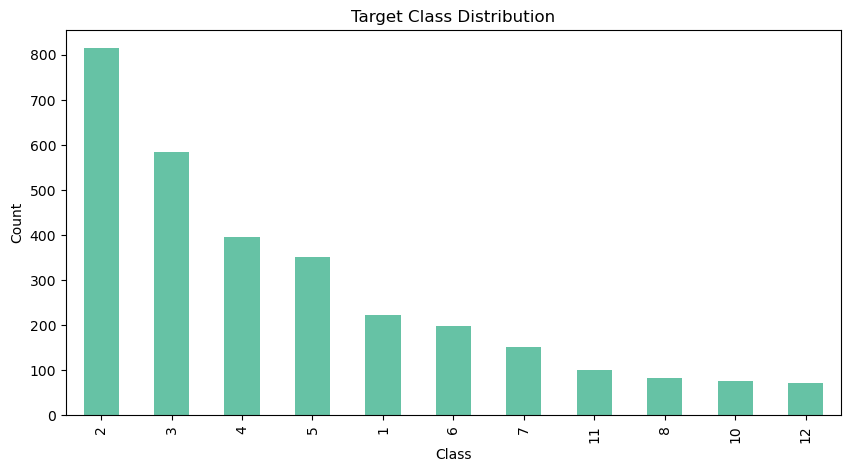

In [26]:
# Assuming df is your DataFrame and 'target' is your target column
target_counts = crop_data['crop'].value_counts()
target_percentage = crop_data['crop'].value_counts(normalize=True) * 100

print("Counts of target classes:")
print(target_counts)

print("\nPercentage distribution of target classes:")
print(target_percentage)

# Bar plot
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

#### Handle Imblanced Use SMOTE Technique

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# Step 2: Split the Dataset
X = crop_data.drop('crop', axis=1)  # Features (excluding the target 'crop')
y = crop_data['crop']  # Target variable (crop)

# Step 3: Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [28]:
print(f"Outcome class size before SMOTE: {y.value_counts()}")
print(f"Outcome class size before SMOTE: {y_resampled.value_counts()}")

Outcome class size before SMOTE: crop
2     814
3     584
4     394
5     350
1     223
6     198
7     150
11     99
8      81
10     75
12     72
Name: count, dtype: int64
Outcome class size before SMOTE: crop
1     814
4     814
3     814
2     814
7     814
5     814
8     814
11    814
12    814
6     814
10    814
Name: count, dtype: int64


#### Split Data Set Traning and Test

In [29]:
from sklearn.model_selection import train_test_split

# Step 5: Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the Shapes of Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (7163, 8)
Shape of testing feature: (1791, 8)
Shape of training label: (7163,)
Shape of testing label: (1791,)


#### Model Building 

#### DecisionTree Classifier With Hyperameter Tuning


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini'],  # Stick with one criterion
    'max_depth': [6, 8],  # Further reduce the tree depth
    'min_samples_split': [30, 40],  # Increase the minimum samples required to split
    'min_samples_leaf': [20, 30]  # Larger leaf nodes
}

# Initialize the model
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the models with the adjusted parameters
grid_search_dt.fit(X_train, y_train)

# Get the best model from the grid search
best_dt_model = grid_search_dt.best_estimator_

# Predict on the training set
y_train_pred = best_dt_model.predict(X_train)

# Predict on the test set
y_test_pred = best_dt_model.predict(X_test)

# Calculate probabilities for ROC curves
y_train_prob = best_dt_model.predict_proba(X_train)[:, 1]
y_test_prob = best_dt_model.predict_proba(X_test)[:, 1]

# Calculate metrics for the best model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Calculate metrics for the best model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Print metrics
print(f'Best Parameters: {grid_search_dt.best_params_}')
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Training Precision: {precision_train:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Training Recall: {recall_train:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Training F1 Score: {f1_train:.2f}')
print(f'Test F1 Score: {f1_test:.2f}')


Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 30}
Training Accuracy: 0.90
Test Accuracy: 0.88
Training Precision: 0.93
Test Precision: 0.91
Training Recall: 0.90
Test Recall: 0.88
Training F1 Score: 0.90
Test F1 Score: 0.88


#### Evalution Model

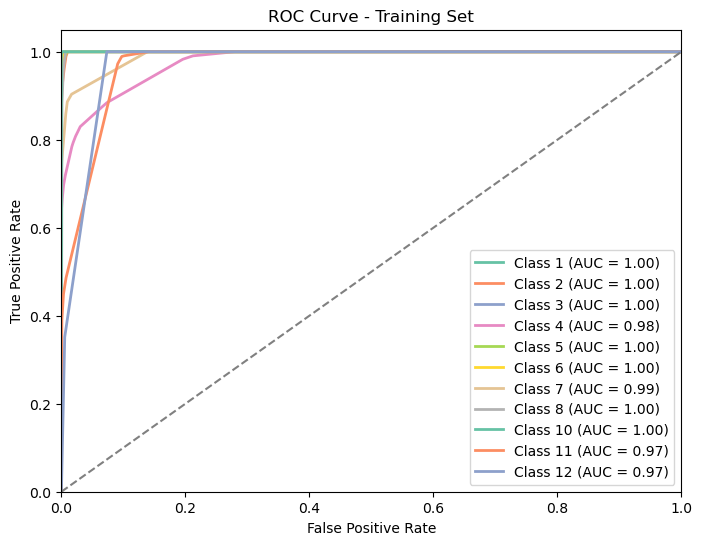

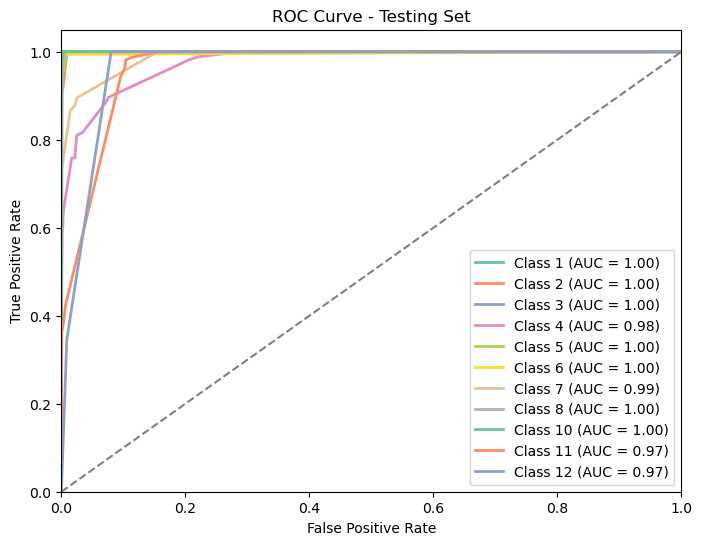

In [31]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Assuming y_train and y_test are your true labels
classes = best_dt_model.classes_

# Binarize the output
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate probabilities for ROC curves
y_train_prob = best_dt_model.predict_proba(X_train)
y_test_prob = best_dt_model.predict_proba(X_test)

# Plotting the ROC Curve for the Training set
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_train:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc="lower right")
plt.show()

# Plotting the ROC Curve for the Testing set
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc="lower right")
plt.show()


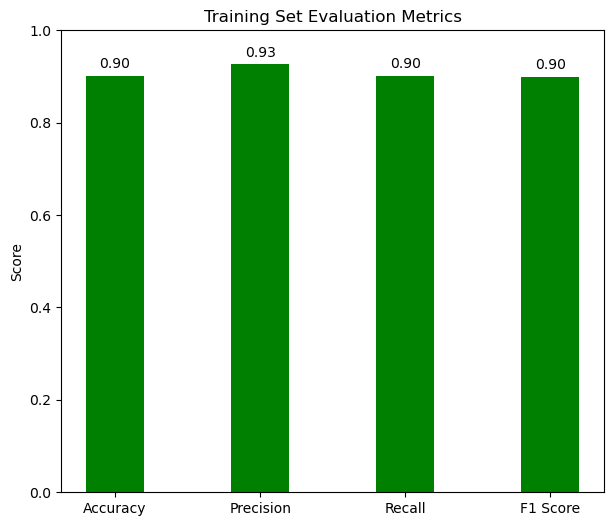

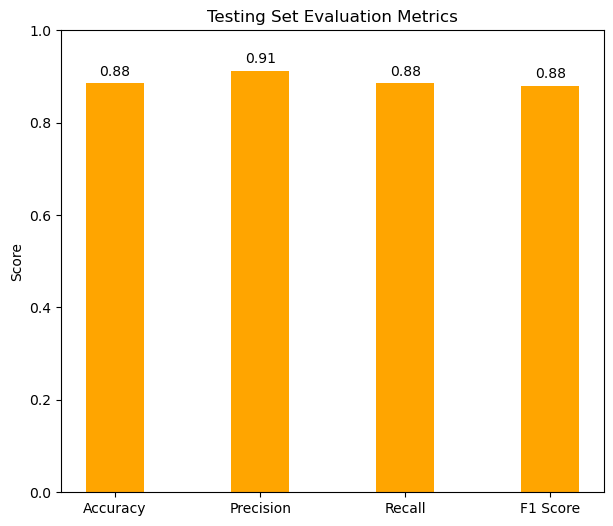

In [32]:
# Define metrics for the training set
metrics_train = {
    'Accuracy': accuracy_train,
    'Precision': precision_train,
    'Recall': recall_train,
    'F1 Score': f1_train
}

# Define metrics for the testing set
metrics_test = {
    'Accuracy': accuracy_test,
    'Precision': precision_test,
    'Recall': recall_test,
    'F1 Score': f1_test
}

# Plotting Training Set Evaluation Metrics
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_train.keys(), metrics_train.values(), color='green', width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Training Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting Testing Set Evaluation Metrics
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_test.keys(), metrics_test.values(), color='orange', width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Testing Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


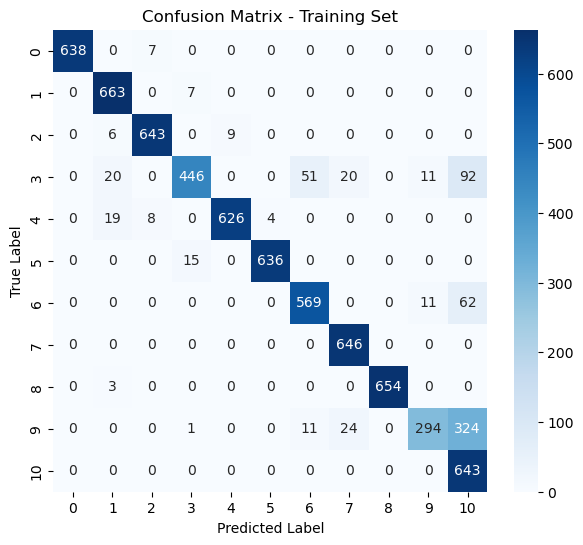

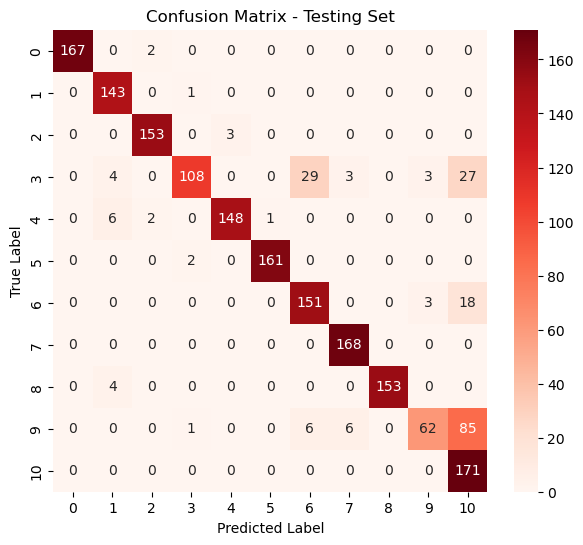

In [33]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices for training and testing datasets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting Confusion Matrix for the Training Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for the Testing Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Build Raindomforest With Hyperameter

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [6, 8],  # Maximum depth of the tree
    'min_samples_split': [30, 40],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [20, 30],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini'],  # Function to measure the quality of a split
}

# Initialize the RandomForestClassifier model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the models with the adjusted parameters
grid_search_rf.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict on the training set
y_train_pred_rf = best_rf_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate probabilities for ROC curves
y_train_prob_rf = best_rf_model.predict_proba(X_train)[:, 1]
y_test_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics for the best model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
recall_test_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
f1_test_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Calculate metrics for the best model on the training set
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
recall_train_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
f1_train_rf = f1_score(y_train, y_train_pred_rf, average='weighted')

# Print metrics
print(f'Best Parameters: {grid_search_rf.best_params_}')
print(f'Training Accuracy: {accuracy_train_rf:.2f}')
print(f'Test Accuracy: {accuracy_test_rf:.2f}')
print(f'Training Precision: {precision_train_rf:.2f}')
print(f'Test Precision: {precision_test_rf:.2f}')
print(f'Training Recall: {recall_train_rf:.2f}')
print(f'Test Recall: {recall_test_rf:.2f}')
print(f'Training F1 Score: {f1_train_rf:.2f}')
print(f'Test F1 Score: {f1_test_rf:.2f}')


Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 200}
Training Accuracy: 0.97
Test Accuracy: 0.96
Training Precision: 0.98
Test Precision: 0.97
Training Recall: 0.97
Test Recall: 0.96
Training F1 Score: 0.97
Test F1 Score: 0.96


#### Evaluation 

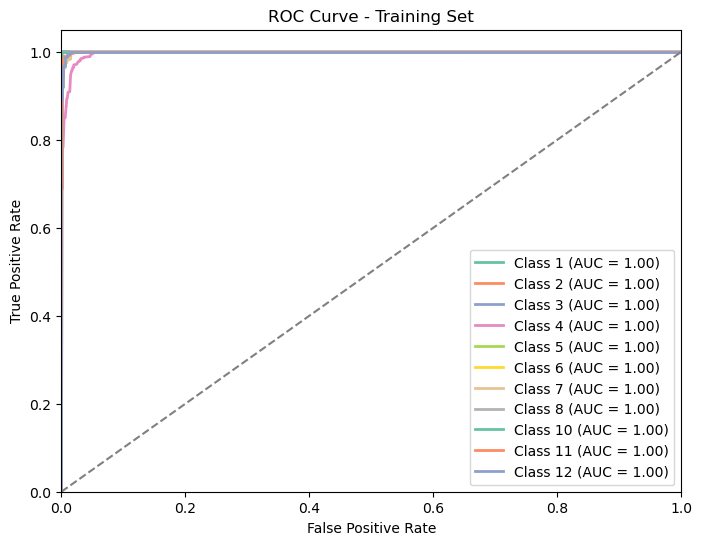

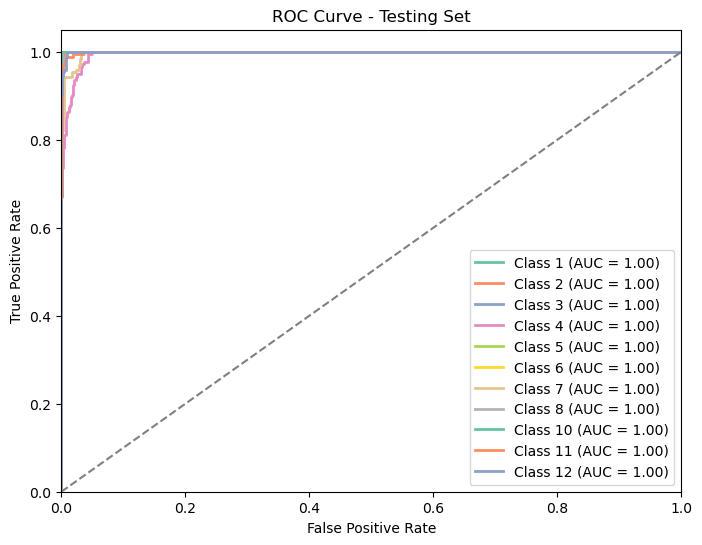

In [35]:
from sklearn.preprocessing import label_binarize

# Assuming y_train and y_test are your true labels
classes = best_rf_model.classes_

# Binarize the output
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate probabilities for ROC curves
y_train_prob = best_rf_model.predict_proba(X_train)
y_test_prob = best_rf_model.predict_proba(X_test)

# Plotting the ROC Curve for the Training set
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_train:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc="lower right")
plt.show()

# Plotting the ROC Curve for the Testing set
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc="lower right")
plt.show()


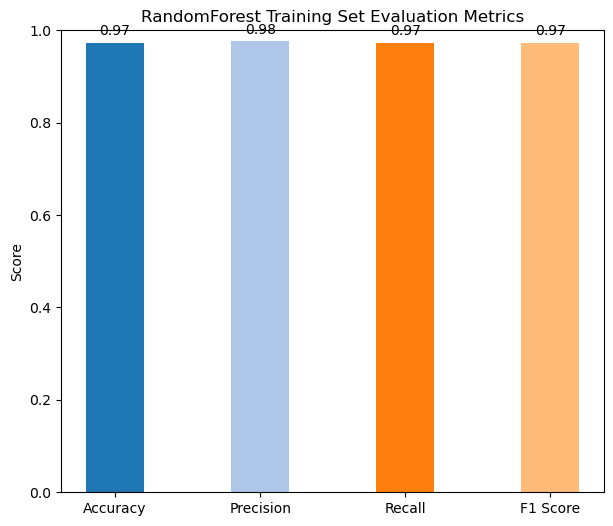

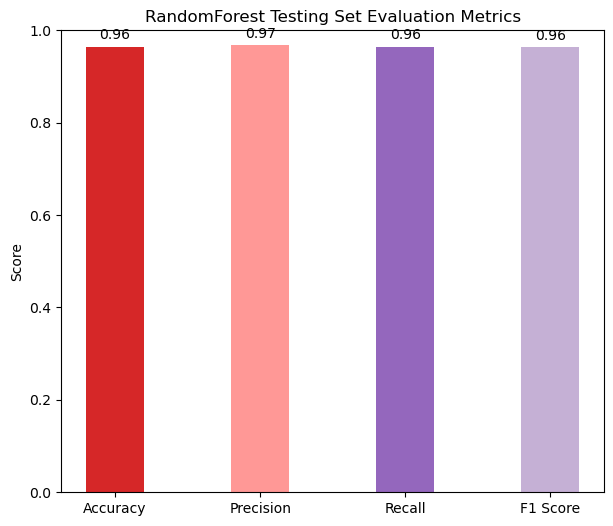

In [36]:

# Define metrics for the training set using RandomForest model
metrics_train_rf = {
    'Accuracy': accuracy_train_rf,
    'Precision': precision_train_rf,
    'Recall': recall_train_rf,
    'F1 Score': f1_train_rf
}

# Define metrics for the testing set using RandomForest model
metrics_test_rf = {
    'Accuracy': accuracy_test_rf,
    'Precision': precision_test_rf,
    'Recall': recall_test_rf,
    'F1 Score': f1_test_rf
}

# Color schemes for the bars
train_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']  # Blue to Orange gradient for training
test_colors = ['#d62728', '#ff9896', '#9467bd', '#c5b0d5']   # Red to Purple gradient for testing

# Plotting Training Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_train_rf.keys(), metrics_train_rf.values(), color=train_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('RandomForest Training Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting Testing Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_test_rf.keys(), metrics_test_rf.values(), color=test_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('RandomForest Testing Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


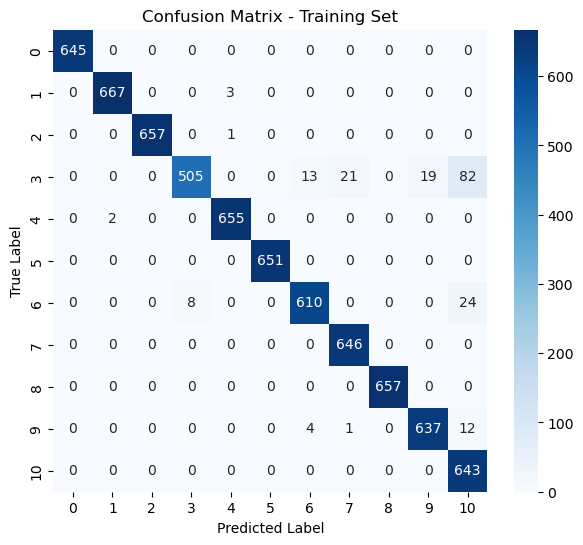

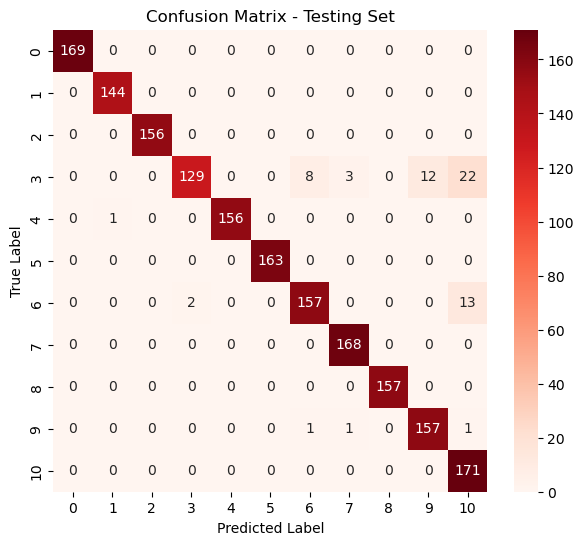

In [37]:
# Generate the confusion matrix for the training set predictions
conf_matrix_train = confusion_matrix(y_train, y_train_pred_rf)

# Generate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(y_test, y_test_pred_rf)

# Plotting Confusion Matrix for the Training Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for the Testing Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### SVM With Hyperameter

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.01, 0.1, 1],  
    'kernel': ['linear'],  # Use only the linear kernel
    'gamma': ['scale']  # Use scale for linear kernel 
}

# Initialize the SVM model
svm = SVC(probability=True)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the adjusted parameters
grid_search_svm.fit(X_train, y_train)

# Get the best model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Predict on the training set
y_train_pred_svm = best_svm_model.predict(X_train)

# Predict on the test set
y_test_pred_svm = best_svm_model.predict(X_test)

# Calculate metrics for the best model on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
precision_test_svm = precision_score(y_test, y_test_pred_svm, average='weighted')
recall_test_svm = recall_score(y_test, y_test_pred_svm, average='weighted')
f1_test_svm = f1_score(y_test, y_test_pred_svm, average='weighted')

# Calculate metrics for the best model on the training set
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
precision_train_svm = precision_score(y_train, y_train_pred_svm, average='weighted')
recall_train_svm = recall_score(y_train, y_train_pred_svm, average='weighted')
f1_train_svm = f1_score(y_train, y_train_pred_svm, average='weighted')

# Print metrics
print(f'Best Parameters: {grid_search_svm.best_params_}')
print(f'Training Accuracy: {accuracy_train_svm:.2f}')
print(f'Test Accuracy: {accuracy_test_svm:.2f}')
print(f'Training Precision: {precision_train_svm:.2f}')
print(f'Test Precision: {precision_test_svm:.2f}')
print(f'Training Recall: {recall_train_svm:.2f}')
print(f'Test Recall: {recall_test_svm:.2f}')
print(f'Training F1 Score: {f1_train_svm:.2f}')
print(f'Test F1 Score: {f1_test_svm:.2f}')


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Training Accuracy: 0.90
Test Accuracy: 0.90
Training Precision: 0.90
Test Precision: 0.90
Training Recall: 0.90
Test Recall: 0.90
Training F1 Score: 0.90
Test F1 Score: 0.90


#### Evalution

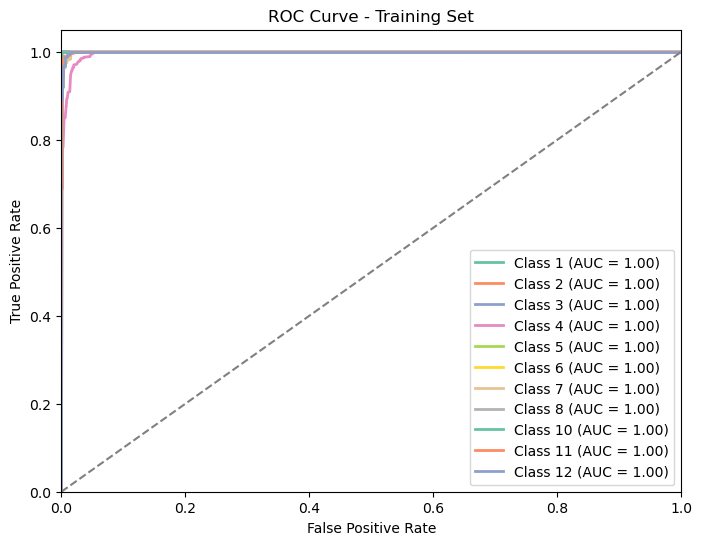

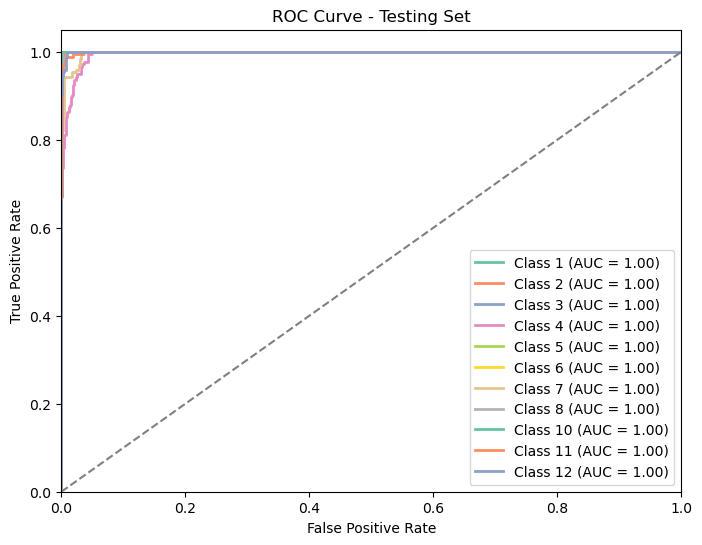

In [39]:
# Assuming y_train and y_test are your true labels
classes = best_svm_model.classes_

# Binarize the output
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate probabilities for ROC curves
y_train_prob = best_rf_model.predict_proba(X_train)
y_test_prob = best_rf_model.predict_proba(X_test)

# Plotting the ROC Curve for the Training set
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_train:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc="lower right")
plt.show()

# Plotting the ROC Curve for the Testing set
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc="lower right")
plt.show()


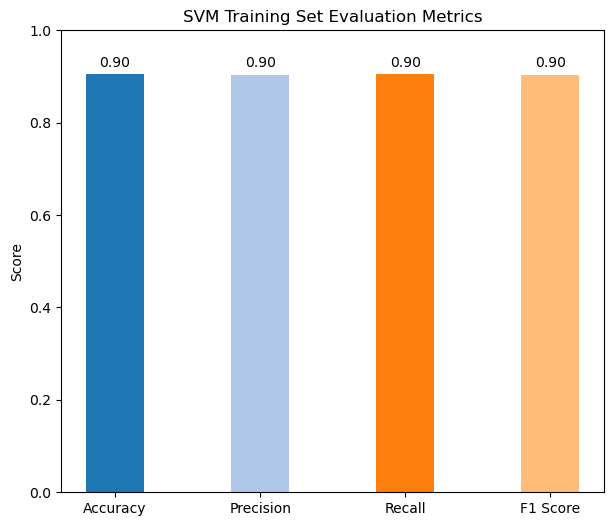

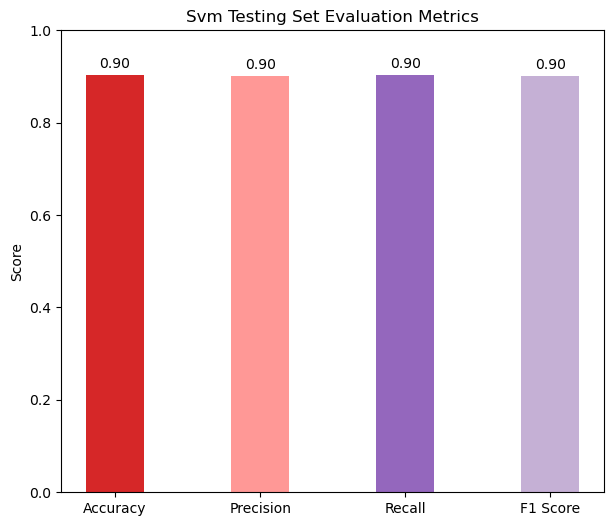

In [40]:
# Define metrics for the training set using RandomForest model
metrics_train_svm = {
    'Accuracy': accuracy_train_svm,
    'Precision': precision_train_svm,
    'Recall': recall_train_svm,
    'F1 Score': f1_train_svm
}

# Define metrics for the testing set using RandomForest model
metrics_test_svm = {
    'Accuracy': accuracy_test_svm,
    'Precision': precision_test_svm,
    'Recall': recall_test_svm,
    'F1 Score': f1_test_svm
}

# Color schemes for the bars
train_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']  # Blue to Orange gradient for training
test_colors = ['#d62728', '#ff9896', '#9467bd', '#c5b0d5']   # Red to Purple gradient for testing

# Plotting Training Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_train_svm.keys(), metrics_train_svm.values(), color=train_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('SVM Training Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting Testing Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_test_svm.keys(), metrics_test_svm.values(), color=test_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Svm Testing Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


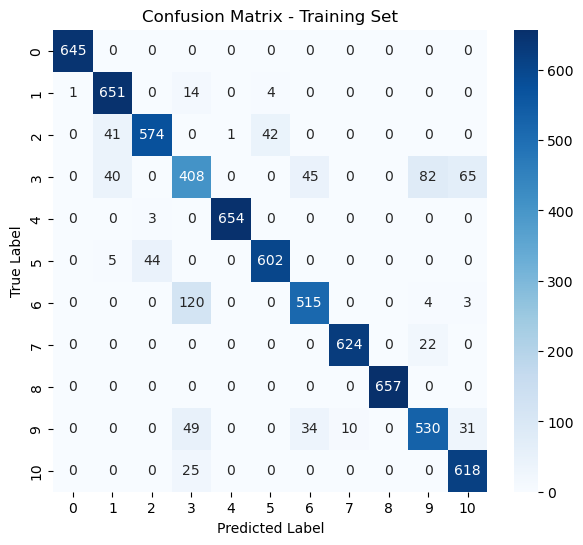

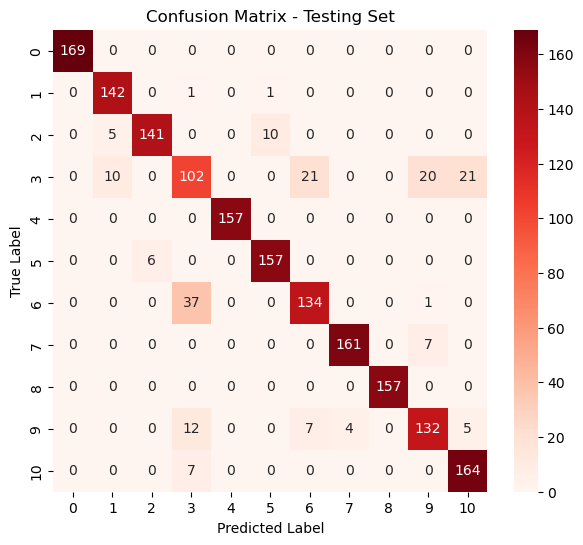

In [41]:
# Generate the confusion matrix for the training set predictions
conf_matrix_train = confusion_matrix(y_train, y_train_pred_svm)

# Generate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(y_test, y_test_pred_svm)

# Plotting Confusion Matrix for the Training Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for the Testing Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Logistic Regression With Hyperameter

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Solvers that support l1 or elasticnet penalties
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Higher max_iter for convergence

# Initialize GridSearchCV
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the adjusted parameters
grid_search_logreg.fit(X_train, y_train)

# Get the best model from the grid search
best_logreg_model = grid_search_logreg.best_estimator_

# Predict on the training set
y_train_pred_logreg = best_logreg_model.predict(X_train)

# Predict on the test set
y_test_pred_logreg = best_logreg_model.predict(X_test)

# Calculate metrics for the best model on the test set
accuracy_test_logreg = accuracy_score(y_test, y_test_pred_logreg)
precision_test_logreg = precision_score(y_test, y_test_pred_logreg, average='weighted')
recall_test_logreg = recall_score(y_test, y_test_pred_logreg, average='weighted')
f1_test_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')

# Calculate metrics for the best model on the training set
accuracy_train_logreg = accuracy_score(y_train, y_train_pred_logreg)
precision_train_logreg = precision_score(y_train, y_train_pred_logreg, average='weighted')
recall_train_logreg = recall_score(y_train, y_train_pred_logreg, average='weighted')
f1_train_logreg = f1_score(y_train, y_train_pred_logreg, average='weighted')

# Print metrics
print(f'Best Parameters: {grid_search_logreg.best_params_}')
print(f'Training Accuracy: {accuracy_train_logreg:.2f}')
print(f'Test Accuracy: {accuracy_test_logreg:.2f}')
print(f'Training Precision: {precision_train_logreg:.2f}')
print(f'Test Precision: {precision_test_logreg:.2f}')
print(f'Training Recall: {recall_train_logreg:.2f}')
print(f'Test Recall: {recall_test_logreg:.2f}')
print(f'Training F1 Score: {f1_train_logreg:.2f}')
print(f'Test F1 Score: {f1_test_logreg:.2f}')

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Training Accuracy: 0.86
Test Accuracy: 0.84
Training Precision: 0.86
Test Precision: 0.84
Training Recall: 0.86
Test Recall: 0.84
Training F1 Score: 0.85
Test F1 Score: 0.84


#### Evaluation

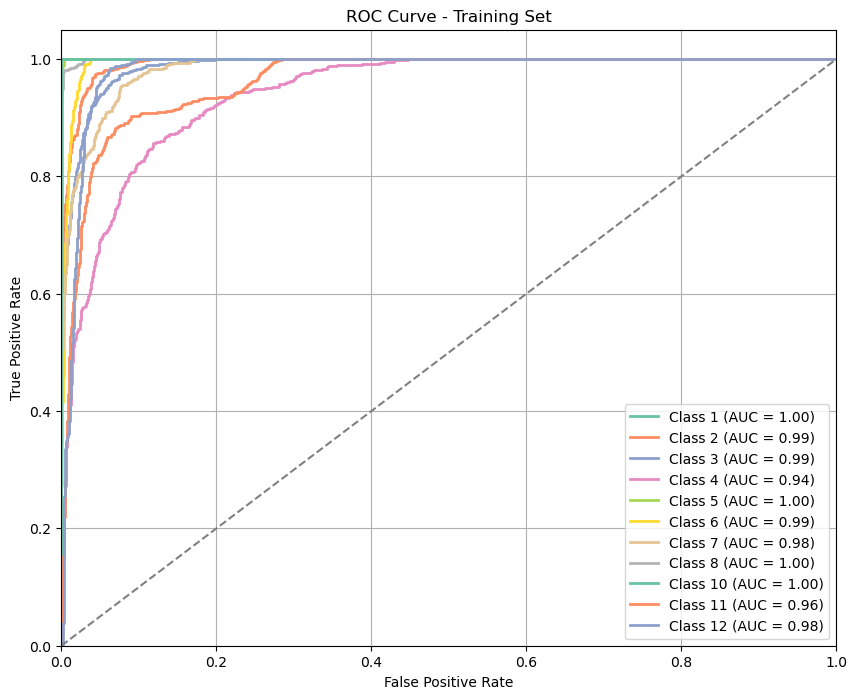

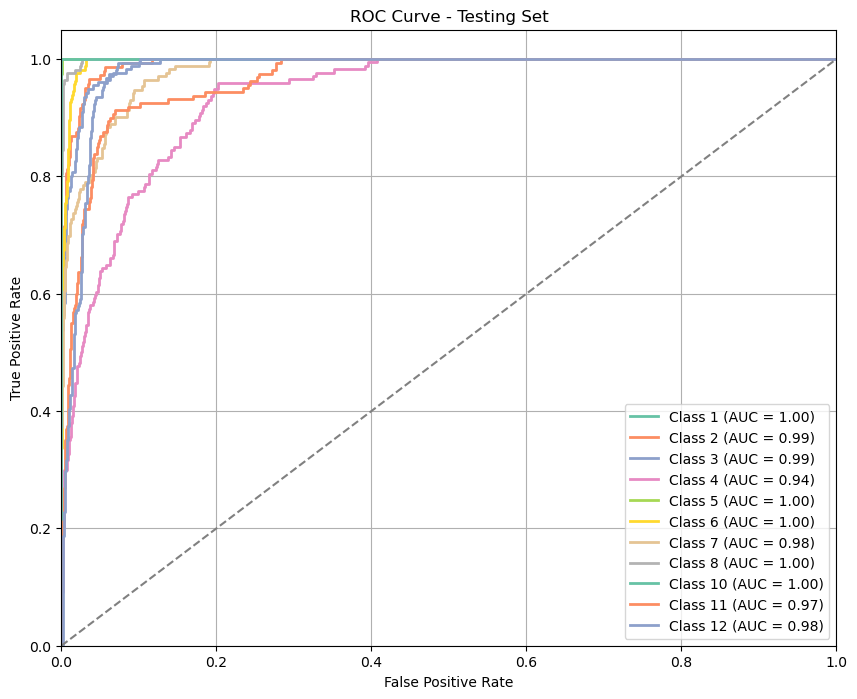

In [43]:

# Assuming y_train and y_test are your true labels
classes = best_logreg_model.classes_

# Binarize the output
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate probabilities for ROC curves
y_train_prob = best_logreg_model.predict_proba(X_train)
y_test_prob = best_logreg_model.predict_proba(X_test)

# Plotting the ROC Curve for the Training set
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_train:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the ROC Curve for the Testing set
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc="lower right")
plt.grid()
plt.show()

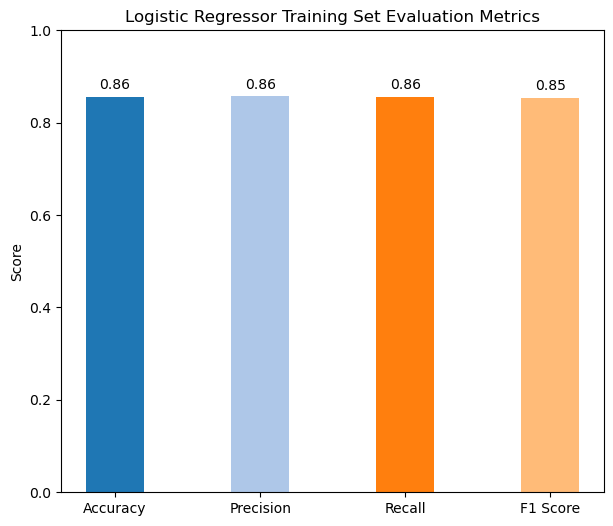

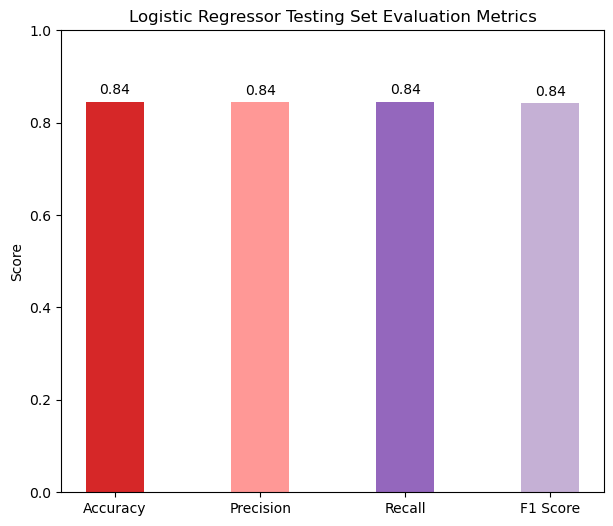

In [44]:
# Define metrics for the training set using RandomForest model
metrics_train_lr = {
    'Accuracy': accuracy_train_logreg,
    'Precision': precision_train_logreg,
    'Recall': recall_train_logreg,
    'F1 Score': f1_train_logreg
}

# Define metrics for the testing set using RandomForest model
metrics_test_lr = {
    'Accuracy': accuracy_test_logreg,
    'Precision': precision_test_logreg,
    'Recall': recall_test_logreg,
    'F1 Score': f1_test_logreg
}

# Color schemes for the bars
train_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']  # Blue to Orange gradient for training
test_colors = ['#d62728', '#ff9896', '#9467bd', '#c5b0d5']   # Red to Purple gradient for testing

# Plotting Training Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_train_lr.keys(), metrics_train_lr.values(), color=train_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Logistic Regressor Training Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting Testing Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_test_lr.keys(), metrics_test_lr.values(), color=test_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title( 'Logistic Regressor Testing Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


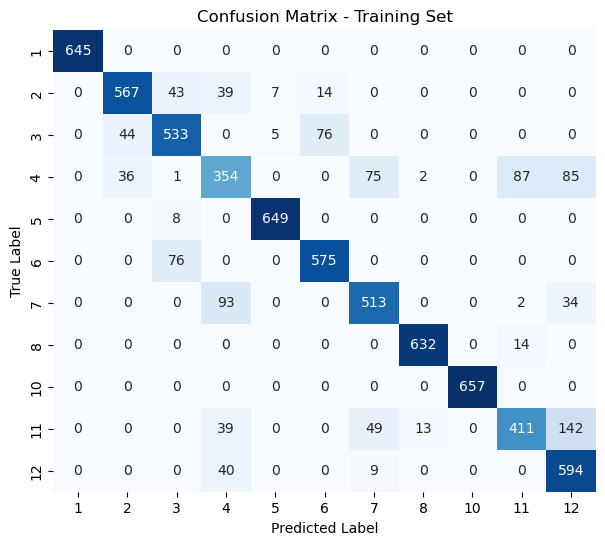

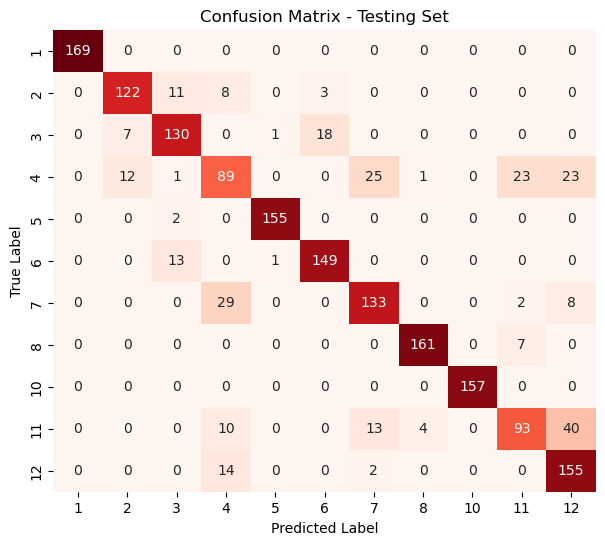

In [45]:
# Generate the confusion matrix for the training set predictions
conf_matrix_train = confusion_matrix(y_train, y_train_pred_logreg)

# Generate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(y_test, y_test_pred_logreg)

# Plotting Confusion Matrix for the Training Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for the Testing Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Model Comparison Plots

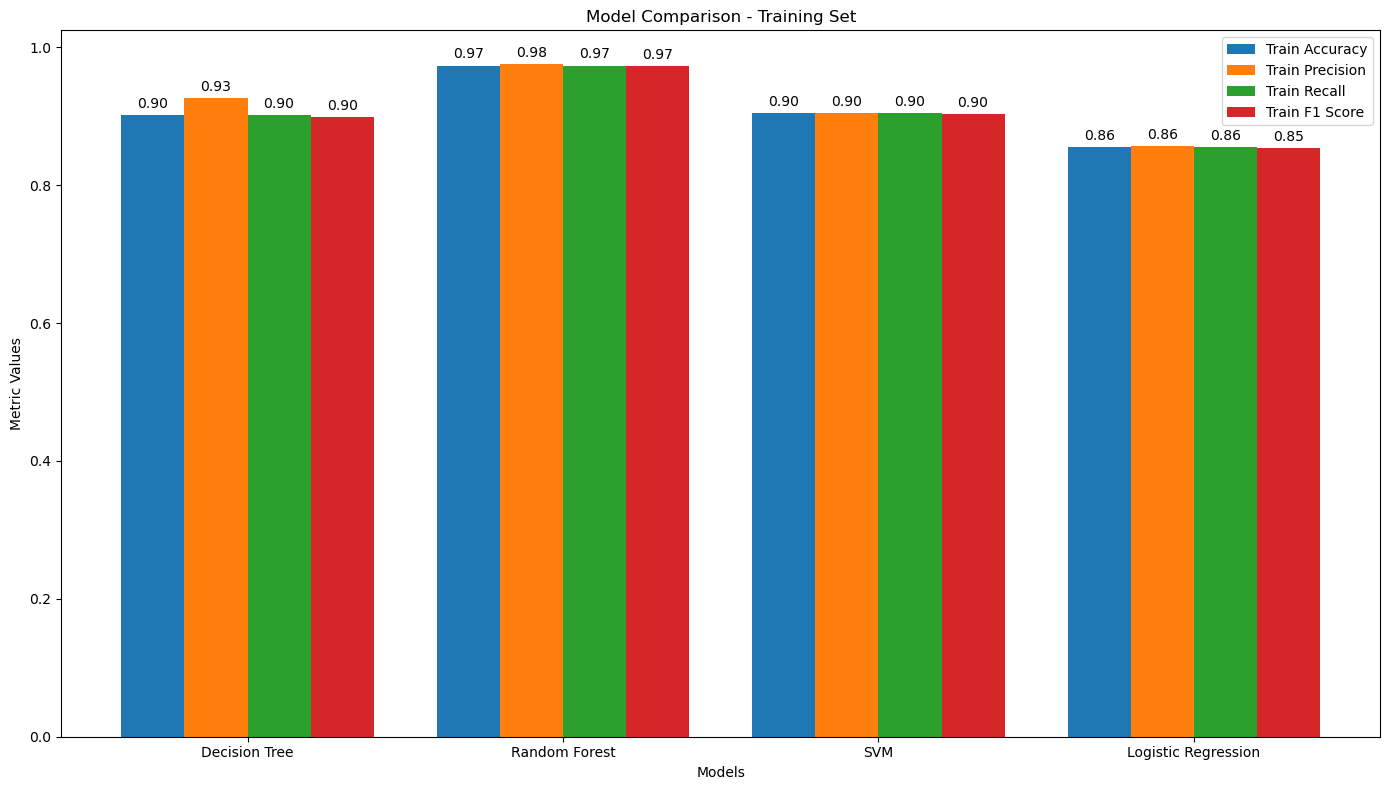

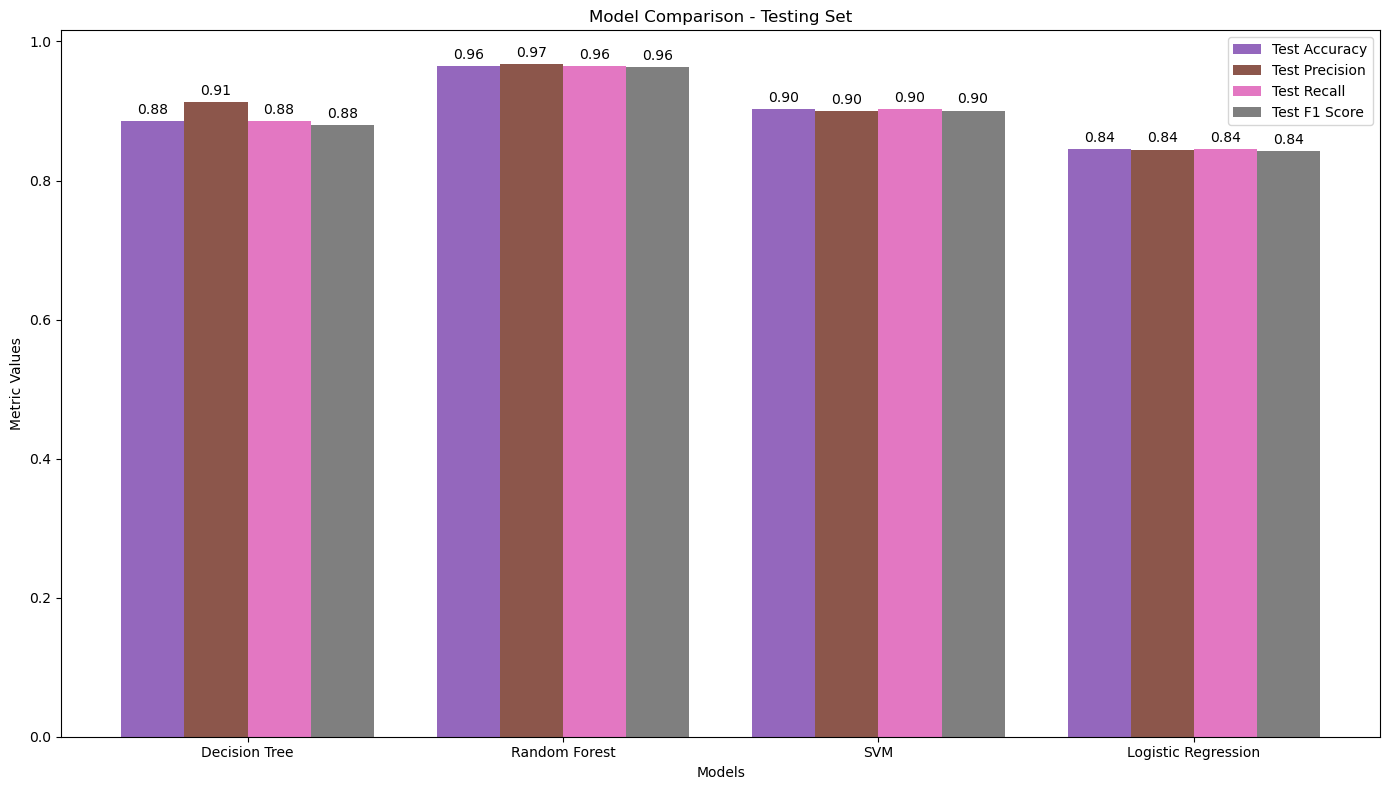

In [46]:
# Define model names
models = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']

# Collect metrics for training and testing sets
train_accuracies = [accuracy_train, accuracy_train_rf, accuracy_train_svm, accuracy_train_logreg]
test_accuracies = [accuracy_test, accuracy_test_rf, accuracy_test_svm, accuracy_test_logreg]

train_precisions = [precision_train, precision_train_rf, precision_train_svm, precision_train_logreg]
test_precisions = [precision_test, precision_test_rf, precision_test_svm, precision_test_logreg]

train_recalls = [recall_train, recall_train_rf, recall_train_svm, recall_train_logreg]
test_recalls = [recall_test, recall_test_rf, recall_test_svm, recall_test_logreg]

train_f1_scores = [f1_train, f1_train_rf, f1_train_svm, f1_train_logreg]
test_f1_scores = [f1_test, f1_test_rf, f1_test_svm, f1_test_logreg]

# Define positions for the bars
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Define colors for the bars
colors_train = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors for training metrics
colors_test = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f']   # Colors for testing metrics

# Plotting Training Metrics
fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width * 1.5, train_accuracies, width, color=colors_train[0], label='Train Accuracy')
bars2 = ax.bar(x - width * 0.5, train_precisions, width, color=colors_train[1], label='Train Precision')
bars3 = ax.bar(x + width * 0.5, train_recalls, width, color=colors_train[2], label='Train Recall')
bars4 = ax.bar(x + width * 1.5, train_f1_scores, width, color=colors_train[3], label='Train F1 Score')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Metric Values')
ax.set_title('Model Comparison - Training Set')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.tight_layout()
plt.show()

# Plotting Testing Metrics
fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width * 1.5, test_accuracies, width, color=colors_test[0], label='Test Accuracy')
bars2 = ax.bar(x - width * 0.5, test_precisions, width, color=colors_test[1], label='Test Precision')
bars3 = ax.bar(x + width * 0.5, test_recalls, width, color=colors_test[2], label='Test Recall')
bars4 = ax.bar(x + width * 1.5, test_f1_scores, width, color=colors_test[3], label='Test F1 Score')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Metric Values')
ax.set_title('Model Comparison - Testing Set')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding value labels on the bars
add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.tight_layout()
plt.show()


### Save Model

In [47]:
import pickle

with open('crop_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model saved as 'crop_model.pkl'")
print("Scaler saved as 'scaler.pkl'")


Model saved as 'crop_model.pkl'
Scaler saved as 'scaler.pkl'


##### The scaler model ensure that any new data can be preprocessed in the same way as the data used to train the model. This step is crucial for achieving consistent and reliable predictions.